## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">DATA SCIENCE ... PROJECT</p>

<a id="toc"></a>

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [INTRODUCTION](#0)
* [IMPORTING MODULES, LOADING DATA & DATA REVIEW](#1)
* [PREPROCESSING](#2)
* [EXPLORATORY DATA ANALYSIS (EDA)](#3)    
* [SCALING, CATEGORICAL VARIABLES, SPLITTING](#4)
* [MODELS](#5)
* [CONCLUSION](#6)

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Introduction</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true"
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## 1.1 Information About the Project
This section provides an overview of the project, its objectives, and the expected outcomes. Students should clearly state the problem they are solving and the overall goal of the project, such as improving model performance or addressing a specific business problem.

**Objective:**  
Define the purpose of the project. Is it a classification, regression, or clustering task? Why is this problem important?

**Scope:**  
Clarify what the project will and won’t cover, emphasizing the importance of building a deployable model.

## 1.2 Description of the Dataset
Introduce the dataset selected for the project:

- **Source:** Mention the source of the dataset (e.g., Kaggle, UCI repository, government open data portals).
- **Size:** The number of records and columns.
- **Type:** Explain if it’s time series, tabular, text, or image data.

## 1.3 Description of the Columns
Provide an in-depth explanation of each feature in the dataset. Identify:

- **Target Variable:** What are you predicting (e.g., a binary or multiclass label, a continuous value)?
- **Feature Variables:** A brief description of the important columns, including their data types.

---



## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Modules, Load Data & Data Review</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [1]:
!pip install pandas==2.2.3
!pip install numpy==1.26.4
!pip install matplotlib==3.8.4
!pip install seaborn==0.13.2
!pip install missingno==0.5.2
!pip install scikit-learn==1.5.2
!pip install xgboost==2.1.2
!pip install lightgbm==4.5.0
!pip install catboost==1.2.7
!pip install imbalanced-learn==0.12.4

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.under_sampling import RandomUnderSampler


In [3]:
df_main = pd.read_csv('Loan_Default.csv')
df = df_main.copy()
pd.set_option("display.max_columns", df.shape[-1]) 


In [4]:
df.sample(10)

ID  year loan_limit             Gender approv_in_adv loan_type  \
147412  172302  2019        ncf              Joint         nopre     type3   
89706   114596  2019         cf               Male         nopre     type1   
64791    89681  2019        ncf              Joint           pre     type1   
91773   116663  2019        NaN               Male         nopre     type3   
2818     27708  2019         cf              Joint         nopre     type1   
104774  129664  2019         cf               Male         nopre     type1   
104973  129863  2019         cf               Male         nopre     type1   
78379   103269  2019        ncf              Joint         nopre     type1   
19218    44108  2019         cf  Sex Not Available         nopre     type2   
147742  172632  2019        ncf               Male         nopre     type2   

       loan_purpose Credit_Worthiness open_credit business_or_commercial  \
147412           p4                l1        nopc                  nob/c   
89706            p4                l1        nopc                  nob/c   
64791            p3                l1        nopc                  nob/c   
91773            p3                l1        nopc                  nob/c   
2818             p4                l1        nopc                  nob/c   
104774           p1                l1        nopc                  nob/c   
104973           p3                l1        nopc                  nob/c   
78379            p1                l1        nopc                  nob/c   
19218            p3                l1        nopc                    b/c   
147742           p3                l1        nopc                    b/c   

        loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
147412       846500             3.125               -0.4031          5956.50   
89706        226500             3.990                0.3226          2662.50   
64791        386500             4.375                0.8730           320.62   
91773        356500               NaN                   NaN              NaN   
2818         186500             3.500                0.0815          5477.64   
104774       886500             4.500                0.2855             0.00   
104973       316500             3.625                0.0104          6675.00   
78379        186500             5.250                1.3595          1687.19   
19218        196500               NaN                   NaN              NaN   
147742        66500             4.375                1.7904          2159.17   

         term Neg_ammortization interest_only lump_sum_payment  \
147412  360.0           not_neg       not_int         not_lpsm   
89706   360.0           not_neg       not_int         not_lpsm   
64791   240.0           not_neg       not_int         not_lpsm   
91773   360.0           neg_amm       not_int         not_lpsm   
2818    324.0           not_neg       not_int         not_lpsm   
104774  360.0           not_neg       not_int         not_lpsm   
104973  360.0           not_neg       not_int         not_lpsm   
78379   360.0           not_neg       not_int         not_lpsm   
19218   360.0           not_neg       not_int         not_lpsm   
147742  300.0           not_neg       not_int         not_lpsm   

        property_value construction_type occupancy_type Secured_by  \
147412        978000.0                sb             pr       home   
89706         328000.0                sb             pr       home   
64791         488000.0                sb             pr       home   
91773              NaN                sb             pr       home   
2818          258000.0                sb             pr       home   
104774       1108000.0                sb             pr       home   
104973        718000.0                sb             pr       home   
78379         248000.0                sb             ir       home   
19218         268000.0                sb             pr       home   
147742  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [6]:
df.shape

(148670, 34)

In [7]:
df.describe(include='all')

ID      year loan_limit  Gender approv_in_adv loan_type  \
count   148670.000000  148670.0     145326  148670        147762    148670   
unique            NaN       NaN          2       4             2         3   
top               NaN       NaN         cf    Male         nopre     type1   
freq              NaN       NaN     135348   42346        124621    113173   
mean     99224.500000    2019.0        NaN     NaN           NaN       NaN   
std      42917.476598       0.0        NaN     NaN           NaN       NaN   
min      24890.000000    2019.0        NaN     NaN           NaN       NaN   
25%      62057.250000    2019.0        NaN     NaN           NaN       NaN   
50%      99224.500000    2019.0        NaN     NaN           NaN       NaN   
75%     136391.750000    2019.0        NaN     NaN           NaN       NaN   
max     173559.000000    2019.0        NaN     NaN           NaN       NaN   

       loan_purpose Credit_Worthiness open_credit business_or_commercial  \
count        148536            148670      148670                 148670   
unique            4                 2           2                      2   
top              p3                l1        nopc                  nob/c   
freq          55934            142344      148114                 127908   
mean            NaN               NaN         NaN                    NaN   
std             NaN               NaN         NaN                    NaN   
min             NaN               NaN         NaN                    NaN   
25%             NaN               NaN         NaN                    NaN   
50%             NaN               NaN         NaN                    NaN   
75%             NaN               NaN         NaN                    NaN   
max             NaN               NaN         NaN                    NaN   

         loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
count   1.486700e+05     112231.000000         112031.000000    109028.000000   
unique           NaN               NaN                   NaN              NaN   
top              NaN               NaN                   NaN              NaN   
freq             NaN               NaN                   NaN              NaN   
mean    3.311177e+05          4.045476              0.441656      3224.996127   
std     1.839093e+05          0.561391              0.513043      3251.121510   
min     1.650000e+04          0.000000             -3.638000         0.000000   
25%     1.965000e+05          3.625000              0.076000       581.490000   
50%     2.965000e+05          3.990000              0.390400      2596.450000   
75%     4.365000e+05          4.375000              0.775400      4812.500000   
max     3.576500e+06          8.000000              3.357000     60000.000000   

                 term Neg_ammortization interest_only lump_sum_payment  \
count   148629.000000            148549        148670           148670   
unique            NaN                 2             2                2   
top               NaN           not_neg       not_int         not_lpsm   
freq              NaN            133420        141560           145286   
mean       335.136582               NaN           NaN              NaN   
std         58.409084               NaN           NaN              NaN   
min         96.000000               NaN           NaN              NaN   
25%        360.000000               NaN           NaN              NaN   
50%        360.000000               NaN           NaN              NaN   
75%        360.000000               NaN           NaN              NaN   
max        360.000000               NaN           NaN              NaN   

        property_value construction_type occupancy_type Secured_by  \
count     1.335720e+05            148670         148670     148670   
unique             NaN                 2              3          2   
top                NaN                sb             pr       home   
freq               NaN     

In [8]:
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Preprocessing</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## 2.1 Data Cleaning
Cleaning the dataset is critical before any analysis. Describe any issues encountered, such as:

- **Duplicates:** Remove duplicate records.
- **Inconsistent Formats:** Address inconsistent data formats (e.g., date formats, string casing).
- **Incorrect Data:** Handle obvious data errors (e.g., negative ages or future dates).


In [9]:
willremove = []

In [10]:
df["ID"].sample(10)

11327      36217
146009    170899
42564      67454
88063     112953
122241    147131
120188    145078
96033     120923
39766      64656
123684    148574
136192    161082
Name: ID, dtype: int64

In [11]:
df["ID"].nunique(),df.shape[0]

(148670, 148670)

In [12]:
willremove.append("ID")

In [13]:
df["year"].sample(10)

32273     2019
131213    2019
60682     2019
100494    2019
89782     2019
33290     2019
51450     2019
102822    2019
107328    2019
356       2019
Name: year, dtype: int64

In [14]:
df["year"].describe()

count    148670.0
mean       2019.0
std           0.0
min        2019.0
25%        2019.0
50%        2019.0
75%        2019.0
max        2019.0
Name: year, dtype: float64

In [15]:
willremove.append("year")

In [16]:
df["loan_limit"].sample(10) 

134083    cf
45568     cf
52298     cf
56399     cf
112415    cf
96280     cf
136462    cf
96852     cf
66141     cf
33322     cf
Name: loan_limit, dtype: object

In [17]:
df["loan_limit"].value_counts(dropna=False)

loan_limit
cf     135348
ncf      9978
NaN      3344
Name: count, dtype: int64

In [18]:
willremove.append("loan_limit")

In [19]:
df["Gender"].sample(10)

93543                 Male
44237                Joint
12420               Female
20143                Joint
95248                 Male
57469                Joint
18764    Sex Not Available
24355                Joint
65662               Female
43656    Sex Not Available
Name: Gender, dtype: object

In [20]:
df["Gender"].value_counts(dropna=False) , df["Gender"].isnull().sum()

(Gender
 Male                 42346
 Joint                41399
 Sex Not Available    37659
 Female               27266
 Name: count, dtype: int64,
 0)

In [21]:
df[df["Gender"]=="Sex Not Available"].sample(3)

ID  year loan_limit             Gender approv_in_adv loan_type  \
39012    63902  2019         cf  Sex Not Available         nopre     type1   
113421  138311  2019         cf  Sex Not Available         nopre     type1   
85943   110833  2019         cf  Sex Not Available         nopre     type1   

       loan_purpose Credit_Worthiness open_credit business_or_commercial  \
39012            p1                l1        nopc                  nob/c   
113421           p4                l1        nopc                  nob/c   
85943            p4                l2        nopc                  nob/c   

        loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
39012        256500             3.625               -0.0052            295.0   
113421       556500             4.375                0.1137           6657.9   
85943        466500             4.625                1.3560           1860.0   

         term Neg_ammortization interest_only lump_sum_payment  \
39012   360.0           not_neg       not_int         not_lpsm   
113421  360.0           not_neg       not_int         not_lpsm   
85943   240.0           not_neg       not_int         not_lpsm   

        property_value construction_type occupancy_type Secured_by  \
39012         458000.0                sb             pr       home   
113421       1058000.0                sb             pr       home   
85943         498000.0                sb             pr       home   

       total_units  income credit_type  Credit_Score co-applicant_credit_type  \
39012           1U  5280.0        CRIF           643                      EXP   
113421          1U  9480.0         EXP           594                      CIB   
85943           1U  9060.0         EXP           604                      EXP   

          age submission_of_application        LTV Region Security_Type  \
39012   45-54                   to_inst  56.004367  south        direct   
113421  35-44                   to_inst  52.599244  south        direct   
85943   65-74                  not_inst  93.674699  south        direct   

        Status  dtir1  
39012        0   51.0  
113421       0   39.0  
85943        0   45.0

In [22]:
df.loc[df["Gender"] == "Sex Not Available", "Gender"] = np.nan

In [23]:
df["Gender"].value_counts(dropna=False), df["Gender"].isnull().sum()

(Gender
 Male      42346
 Joint     41399
 NaN       37659
 Female    27266
 Name: count, dtype: int64,
 37659)

In [24]:
willremove.append("Gender")

In [25]:
df["approv_in_adv"].sample(10)

123263    nopre
28605     nopre
59584     nopre
135072    nopre
28064     nopre
98005     nopre
27681     nopre
4887      nopre
4016      nopre
30647     nopre
Name: approv_in_adv, dtype: object

In [26]:
df["approv_in_adv"].value_counts(dropna=False)

approv_in_adv
nopre    124621
pre       23141
NaN         908
Name: count, dtype: int64

In [27]:
willremove.append("approv_in_adv")

In [28]:
df["loan_type"].sample(10)

64147     type1
40373     type2
76885     type1
49512     type1
89955     type3
90007     type1
37916     type3
76286     type1
101691    type1
43794     type1
Name: loan_type, dtype: object

In [29]:
df["loan_type"].value_counts(dropna=False)

loan_type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64

In [30]:
willremove.append("loan_type")

In [31]:
df["loan_purpose"].sample(10)

139504    p4
124606    p1
9999      p4
32334     p4
10503     p3
24376     p1
56640     p1
115910    p3
66988     p1
129188    p1
Name: loan_purpose, dtype: object

In [32]:
df["loan_purpose"].value_counts(dropna=False)

loan_purpose
p3     55934
p4     54799
p1     34529
p2      3274
NaN      134
Name: count, dtype: int64

In [33]:
willremove.append("loan_purpose")

In [34]:
df["Credit_Worthiness"].sample(10)

58253     l2
44041     l1
103454    l1
144700    l1
90022     l1
148050    l1
148013    l1
39750     l1
83009     l1
79351     l1
Name: Credit_Worthiness, dtype: object

In [35]:
df["Credit_Worthiness"].value_counts(dropna=False)

Credit_Worthiness
l1    142344
l2      6326
Name: count, dtype: int64

In [36]:
willremove.append("Credit_Worthiness")

In [37]:
df["open_credit"].sample(10)

110375    nopc
137908    nopc
120118    nopc
112814    nopc
8533      nopc
4186      nopc
137509    nopc
110738    nopc
144665    nopc
23695     nopc
Name: open_credit, dtype: object

In [38]:
df["open_credit"].value_counts(dropna=False)

open_credit
nopc    148114
opc        556
Name: count, dtype: int64

In [39]:
willremove.append("open_credit")

In [40]:
df["business_or_commercial"].sample(10)

136563    nob/c
116538    nob/c
131544    nob/c
13537     nob/c
124509    nob/c
46245     nob/c
46613     nob/c
88530     nob/c
60091     nob/c
6566      nob/c
Name: business_or_commercial, dtype: object

In [41]:
df["business_or_commercial"].value_counts(dropna=False)

business_or_commercial
nob/c    127908
b/c       20762
Name: count, dtype: int64

In [42]:
willremove.append("business_or_commercial")

In [43]:
df["loan_amount"].sample(10)

44326     496500
132368    146500
43549     336500
145032    386500
66994     326500
135360     86500
53942     166500
86463     606500
77871     266500
79437     116500
Name: loan_amount, dtype: int64

In [44]:
df["loan_amount"].describe(),df["loan_amount"].isnull().sum()

(count    1.486700e+05
 mean     3.311177e+05
 std      1.839093e+05
 min      1.650000e+04
 25%      1.965000e+05
 50%      2.965000e+05
 75%      4.365000e+05
 max      3.576500e+06
 Name: loan_amount, dtype: float64,
 0)

In [45]:
df["rate_of_interest"].sample(10)

77187       NaN
137389    4.125
20998     4.250
78596       NaN
71406     3.500
23012       NaN
82686     4.560
68758     4.250
6474      4.250
134439    3.875
Name: rate_of_interest, dtype: float64

In [46]:
df["rate_of_interest"].describe(),df["rate_of_interest"].isnull().sum()

(count    112231.000000
 mean          4.045476
 std           0.561391
 min           0.000000
 25%           3.625000
 50%           3.990000
 75%           4.375000
 max           8.000000
 Name: rate_of_interest, dtype: float64,
 36439)

In [47]:
willremove.append("rate_of_interest")

In [48]:
df["Interest_rate_spread"].sample(10)

89280        NaN
60127     0.0464
132838    1.3444
140793    0.5993
130917       NaN
120230    0.6826
117249    0.4172
15439     1.0768
34610     0.9921
89206        NaN
Name: Interest_rate_spread, dtype: float64

In [49]:
df["Interest_rate_spread"].describe(),df["Interest_rate_spread"].isnull().sum()

(count    112031.000000
 mean          0.441656
 std           0.513043
 min          -3.638000
 25%           0.076000
 50%           0.390400
 75%           0.775400
 max           3.357000
 Name: Interest_rate_spread, dtype: float64,
 36639)

In [50]:
willremove.append("Interest_rate_spread")

In [51]:
df["Upfront_charges"].sample(10)

20884        0.00
134298       0.00
107311       0.00
25054        0.00
20066     5451.00
62058         NaN
65951         NaN
130046    3830.40
96217       68.16
108779    2504.39
Name: Upfront_charges, dtype: float64

In [52]:
df["Upfront_charges"].describe(),df["Upfront_charges"].isnull().sum()

(count    109028.000000
 mean       3224.996127
 std        3251.121510
 min           0.000000
 25%         581.490000
 50%        2596.450000
 75%        4812.500000
 max       60000.000000
 Name: Upfront_charges, dtype: float64,
 39642)

In [53]:
df["term"].sample(10)

118727    144.0
32407     360.0
143970    360.0
113210    360.0
76716     360.0
18915     300.0
95072     360.0
90668     360.0
98423     240.0
127435    360.0
Name: term, dtype: float64

In [54]:
df["term"].describe(),df["term"].isnull().sum()

(count    148629.000000
 mean        335.136582
 std          58.409084
 min          96.000000
 25%         360.000000
 50%         360.000000
 75%         360.000000
 max         360.000000
 Name: term, dtype: float64,
 41)

In [55]:
df["term"].value_counts(dropna=False)

term
360.0    121685
180.0     12981
240.0      5859
300.0      2822
324.0      2766
120.0       510
144.0       263
348.0       260
336.0       213
96.0        194
312.0       185
156.0       174
216.0       115
276.0       100
132.0        93
288.0        90
168.0        82
228.0        74
204.0        59
264.0        43
NaN          41
108.0        33
192.0        17
252.0         8
165.0         1
280.0         1
322.0         1
Name: count, dtype: int64

In [56]:
df["Neg_ammortization"].sample(10)

104780    neg_amm
99842     not_neg
94109     not_neg
50729     not_neg
54391     not_neg
11234     not_neg
54929     not_neg
135788    not_neg
92954     not_neg
64659     not_neg
Name: Neg_ammortization, dtype: object

In [57]:
df["Neg_ammortization"].value_counts(dropna=False)

Neg_ammortization
not_neg    133420
neg_amm     15129
NaN           121
Name: count, dtype: int64

In [58]:
willremove.append("Neg_ammortization")

In [59]:
df["interest_only"].sample(10)

105470     not_int
92877      not_int
117788     not_int
7948       not_int
102817    int_only
36044     int_only
78872      not_int
49535      not_int
132335     not_int
70811      not_int
Name: interest_only, dtype: object

In [60]:
df["interest_only"].value_counts(dropna=False)

interest_only
not_int     141560
int_only      7110
Name: count, dtype: int64

In [61]:
willremove.append("interest_only")

In [62]:
df["lump_sum_payment"].sample(10)

55711     not_lpsm
2056      not_lpsm
137737    not_lpsm
5254      not_lpsm
66391     not_lpsm
50677     not_lpsm
42294     not_lpsm
107481    not_lpsm
30384     not_lpsm
94364     not_lpsm
Name: lump_sum_payment, dtype: object

In [63]:
df["lump_sum_payment"].value_counts(dropna=False)

lump_sum_payment
not_lpsm    145286
lpsm          3384
Name: count, dtype: int64

In [64]:
willremove.append("lump_sum_payment")

In [65]:
df["property_value"].sample(10)

83401     578000.0
73008     308000.0
139532         NaN
2637      608000.0
110001    338000.0
144135    358000.0
79200     508000.0
22460     548000.0
47569     528000.0
138432    698000.0
Name: property_value, dtype: float64

In [66]:
df["property_value"].describe(),df["property_value"].isnull().sum()

(count    1.335720e+05
 mean     4.978935e+05
 std      3.599353e+05
 min      8.000000e+03
 25%      2.680000e+05
 50%      4.180000e+05
 75%      6.280000e+05
 max      1.650800e+07
 Name: property_value, dtype: float64,
 15098)

In [67]:
df["construction_type"].sample(10)

79491     sb
429       sb
23820     sb
98624     sb
56033     sb
148398    sb
84662     sb
4664      sb
8060      sb
21801     sb
Name: construction_type, dtype: object

In [68]:
df["construction_type"].value_counts(dropna=False)

construction_type
sb    148637
mh        33
Name: count, dtype: int64

In [69]:
willremove.append("construction_type")

In [70]:
df["occupancy_type"].sample(10)

75067     pr
99302     pr
111066    pr
72303     pr
103274    sr
140402    pr
4241      pr
35565     pr
145565    pr
95946     pr
Name: occupancy_type, dtype: object

In [71]:
df["occupancy_type"].value_counts(dropna=False)

occupancy_type
pr    138201
ir      7340
sr      3129
Name: count, dtype: int64

In [72]:
willremove.append("occupancy_type")

In [73]:
df["Secured_by"].sample(10)

41622     home
72927     home
65993     home
96987     home
981       home
104753    home
119972    home
120890    home
46580     home
13023     home
Name: Secured_by, dtype: object

In [74]:
df["Secured_by"].value_counts(dropna=False)

Secured_by
home    148637
land        33
Name: count, dtype: int64

In [75]:
willremove.append("Secured_by")

In [76]:
df["total_units"].sample(10)    

24689     1U
132657    1U
132008    4U
130848    1U
72544     1U
112777    1U
131338    1U
132461    1U
131998    1U
136736    1U
Name: total_units, dtype: object

In [77]:
df["total_units"].value_counts(dropna=False)

total_units
1U    146480
2U      1477
3U       393
4U       320
Name: count, dtype: int64

In [78]:
willremove.append("total_units")

In [79]:
df["income"].sample(10)

72195      2700.0
42791      4740.0
80360      8580.0
109060        0.0
52006      4320.0
5130       5940.0
39498     11700.0
49379         NaN
50857      3720.0
74384      5460.0
Name: income, dtype: float64

In [80]:
df["income"].describe(),df["income"].isnull().sum()

(count    139520.000000
 mean       6957.338876
 std        6496.586382
 min           0.000000
 25%        3720.000000
 50%        5760.000000
 75%        8520.000000
 max      578580.000000
 Name: income, dtype: float64,
 9150)

In [81]:
df["credit_type"].sample(10)

34482     CRIF
11101     EQUI
140345     CIB
136943     EXP
57509      CIB
138972    EQUI
104082     EXP
89354      CIB
92870      EXP
138182     EXP
Name: credit_type, dtype: object

In [82]:
df["credit_type"].value_counts(dropna=False)

credit_type
CIB     48152
CRIF    43901
EXP     41319
EQUI    15298
Name: count, dtype: int64

In [83]:
willremove.append("credit_type")

In [84]:
df["Credit_Score"].sample(10)

2994      797
90254     718
70992     573
16484     607
61755     586
28402     618
89681     550
86584     789
123750    537
136980    513
Name: Credit_Score, dtype: int64

In [85]:
df["Credit_Score"].describe(),df["Credit_Score"].isnull().sum()

(count    148670.000000
 mean        699.789103
 std         115.875857
 min         500.000000
 25%         599.000000
 50%         699.000000
 75%         800.000000
 max         900.000000
 Name: Credit_Score, dtype: float64,
 0)

In [86]:
df["co-applicant_credit_type"].sample(10)

76223     EXP
66310     EXP
78887     CIB
99428     EXP
25031     CIB
72908     EXP
148578    EXP
90697     EXP
115635    CIB
33434     CIB
Name: co-applicant_credit_type, dtype: object

In [87]:
df["co-applicant_credit_type"].value_counts(dropna=False)

co-applicant_credit_type
CIB    74392
EXP    74278
Name: count, dtype: int64

In [88]:
willremove.append("co-applicant_credit_type")

In [89]:
df["age"].sample(10)

126941      >74
148492    55-64
40187     45-54
131464    45-54
67630     55-64
105711    45-54
39026     45-54
115514    35-44
5100      25-34
30619     65-74
Name: age, dtype: object

In [90]:
df["age"].value_counts(dropna=False)

age
45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
NaN        200
Name: count, dtype: int64

In [91]:
df["submission_of_application"].sample(10)

123728     to_inst
47464     not_inst
102934     to_inst
77541      to_inst
90889      to_inst
125492    not_inst
63586     not_inst
43106      to_inst
64658      to_inst
133639     to_inst
Name: submission_of_application, dtype: object

In [92]:
df["submission_of_application"].value_counts(dropna=False)

submission_of_application
to_inst     95814
not_inst    52656
NaN           200
Name: count, dtype: int64

In [93]:
willremove.append("submission_of_application")

In [94]:
df["LTV"].sample(10)

102114    94.454225
14594     90.966387
17665     34.844271
37822     84.514925
37383     59.831461
136625          NaN
140721    86.525974
15009     59.955752
47162     75.697970
36899     93.882979
Name: LTV, dtype: float64

In [95]:
df["LTV"].describe(),df["LTV"].isnull().sum()       

(count    133572.000000
 mean         72.746457
 std          39.967603
 min           0.967478
 25%          60.474860
 50%          75.135870
 75%          86.184211
 max        7831.250000
 Name: LTV, dtype: float64,
 15098)

In [96]:
df["Region"].sample(10)

114866    North
120257    south
132132    North
118952    south
116437    North
36702     south
40695     south
74944     North
110574    North
123172    south
Name: Region, dtype: object

In [97]:
df["Region"].value_counts(dropna=False)

Region
North         74722
south         64016
central        8697
North-East     1235
Name: count, dtype: int64

In [98]:
willremove.append("Region")

In [99]:
df["Security_Type"].sample(10)

14289     direct
21729     direct
109870    direct
16883     direct
70973     direct
88202     direct
67530     direct
26776     direct
108998    direct
13229     direct
Name: Security_Type, dtype: object

In [100]:
df["Security_Type"].value_counts(dropna=False)

Security_Type
direct      148637
Indriect        33
Name: count, dtype: int64

In [101]:
willremove.append("Security_Type")

In [102]:
df["Status"].sample(10)

59853     0
44545     1
86975     0
142041    0
57357     1
86400     0
10218     0
53983     0
62666     0
117789    0
Name: Status, dtype: int64

In [103]:
df["Status"].value_counts(dropna=False) 

Status
0    112031
1     36639
Name: count, dtype: int64

In [104]:
df["dtir1"].sample(10)

36884     31.0
66555     40.0
120478    44.0
3853      41.0
60386     41.0
25680     38.0
16962     44.0
109552    34.0
46159     36.0
8534       NaN
Name: dtir1, dtype: float64

In [105]:
df["dtir1"].describe(),df["dtir1"].isnull().sum()

(count    124549.000000
 mean         37.732932
 std          10.545435
 min           5.000000
 25%          31.000000
 50%          39.000000
 75%          45.000000
 max          61.000000
 Name: dtir1, dtype: float64,
 24121)

In [106]:
[i for i in df.columns if not i in willremove]

['loan_amount',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'Credit_Score',
 'age',
 'LTV',
 'Status',
 'dtir1']

In [107]:
df_old = df.copy()

In [108]:
df.drop(willremove,axis=1,inplace=True)

In [109]:
df.head()

loan_amount  Upfront_charges   term  property_value   income  Credit_Score  \
0       116500              NaN  360.0        118000.0   1740.0           758   
1       206500              NaN  360.0             NaN   4980.0           552   
2       406500            595.0  360.0        508000.0   9480.0           834   
3       456500              NaN  360.0        658000.0  11880.0           587   
4       696500              0.0  360.0        758000.0  10440.0           602   

     age        LTV  Status  dtir1  
0  25-34  98.728814       1   45.0  
1  55-64        NaN       1    NaN  
2  35-44  80.019685       0   46.0  
3  45-54  69.376900       0   42.0  
4  25-34  91.886544       0   39.0

## 2.2 Missing Value Analysis
Evaluate the dataset for missing values:

- **Percentage of Missing Data:** Identify the percentage of missing data for each feature.
- **Handling Missing Data:** Explain the strategy used to handle missing values (e.g., removal, imputation using mean, median, mode, or more advanced methods).

<Axes: >

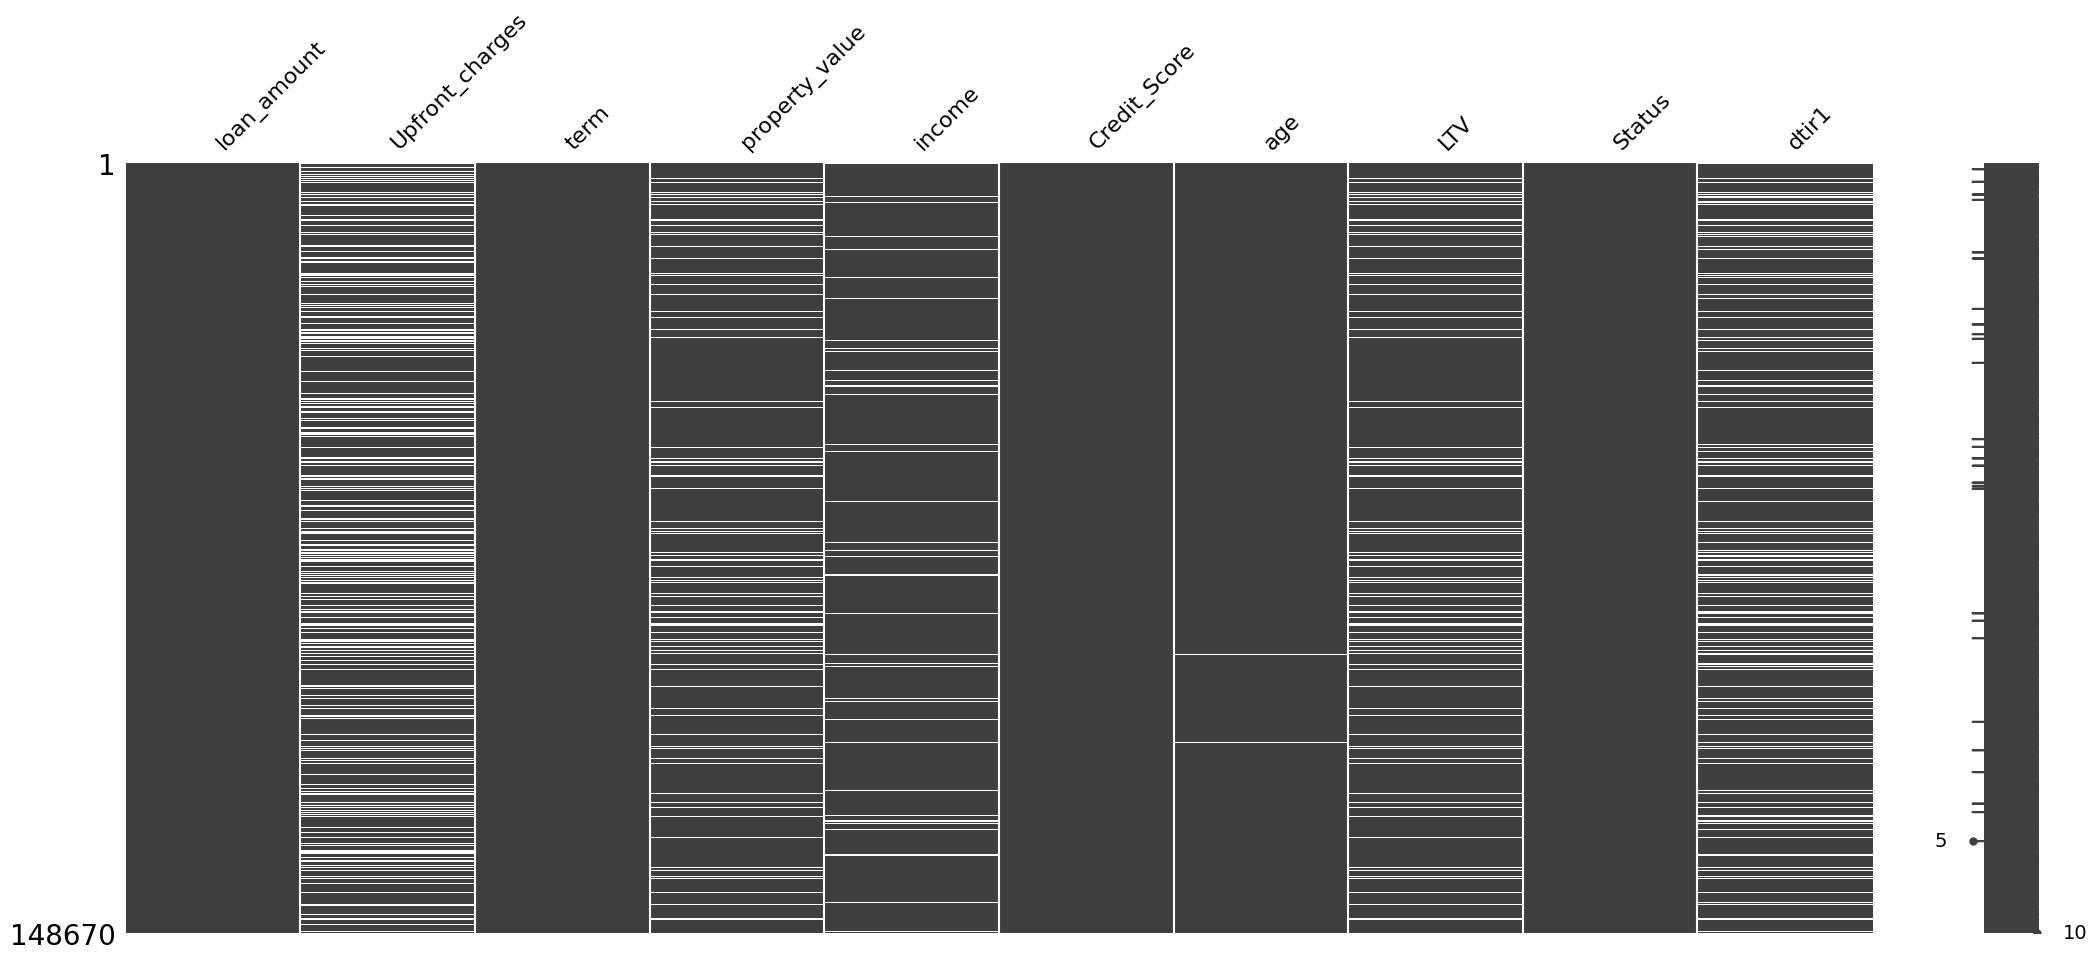

In [110]:
msno.matrix(df)

In [111]:
total = df.shape[0]
miss_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
miss_percent = {}
for col in miss_columns:
    null_count = df[col].isnull().sum()
    percent = (null_count/total) * 100
    miss_percent[col] = percent
    print("{} : {} ({}%)".format(col, null_count, round(percent, 3)))

Upfront_charges : 39642 (26.664%)
term : 41 (0.028%)
property_value : 15098 (10.155%)
income : 9150 (6.155%)
age : 200 (0.135%)
LTV : 15098 (10.155%)
dtir1 : 24121 (16.225%)


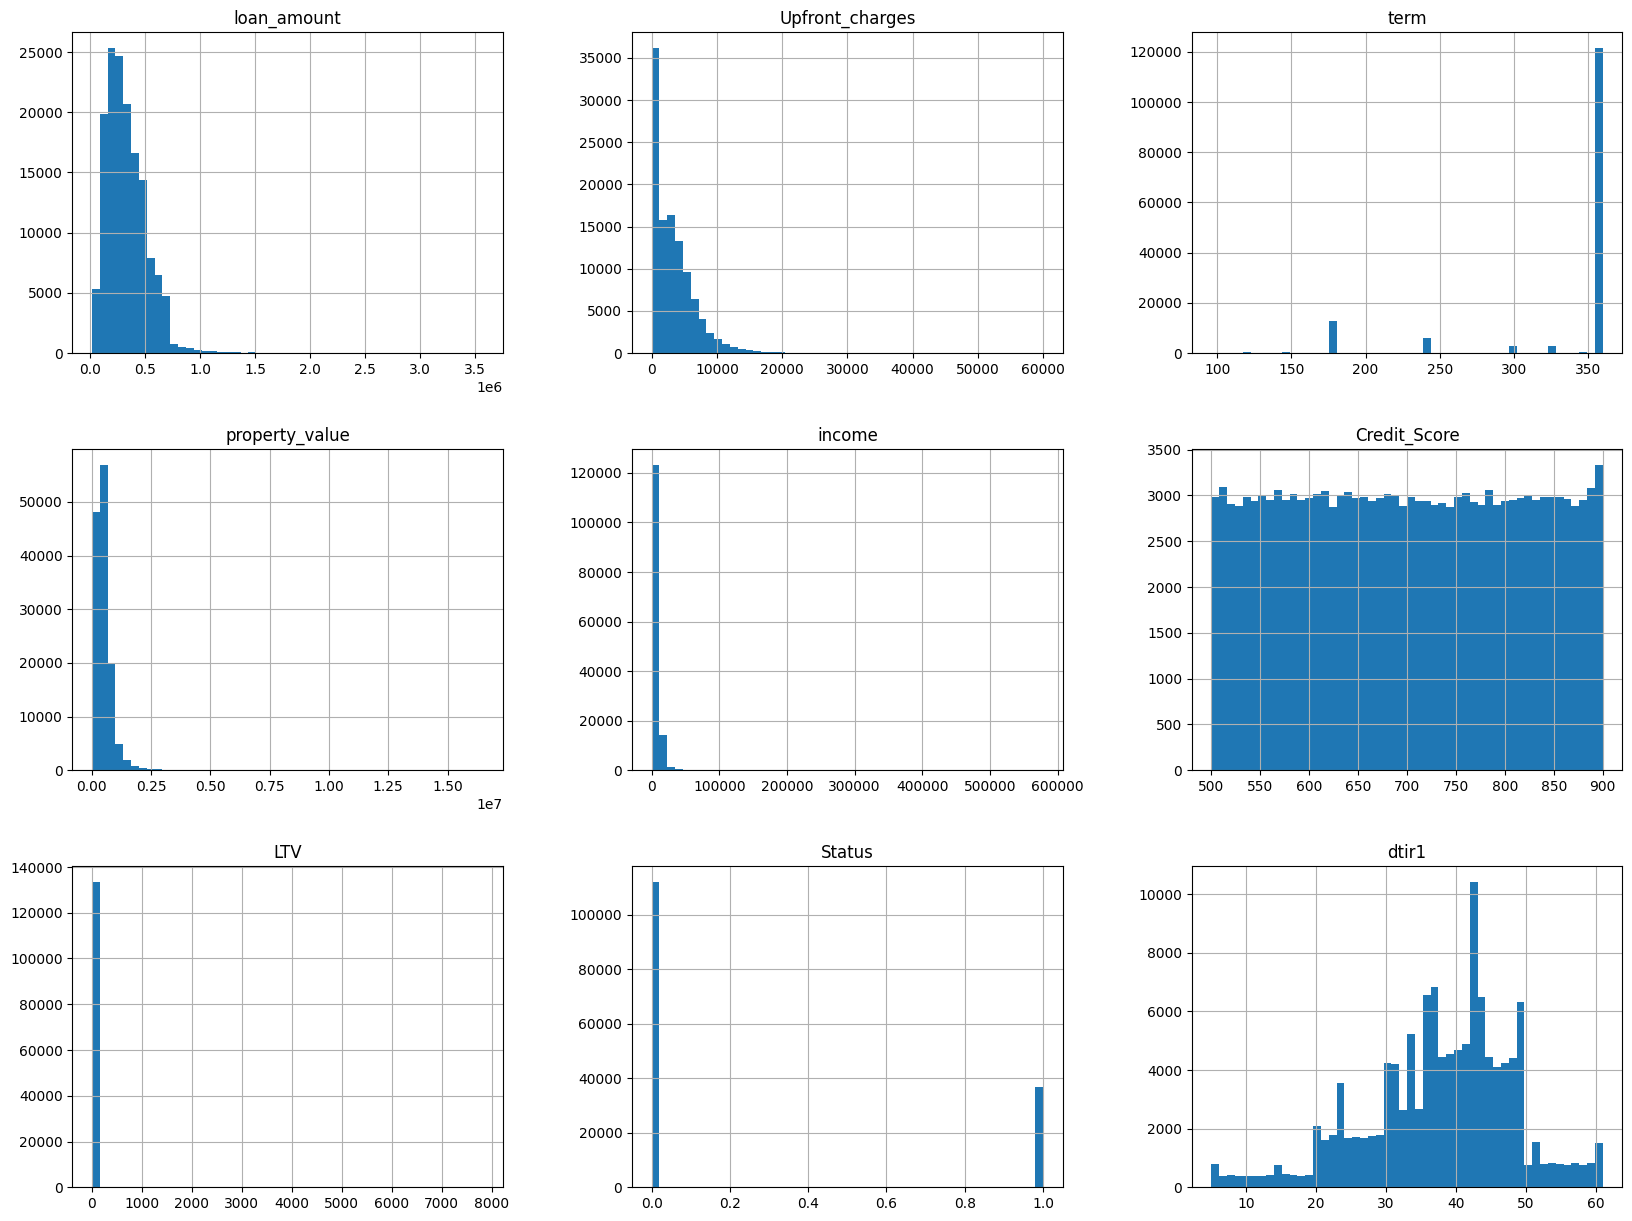

In [112]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

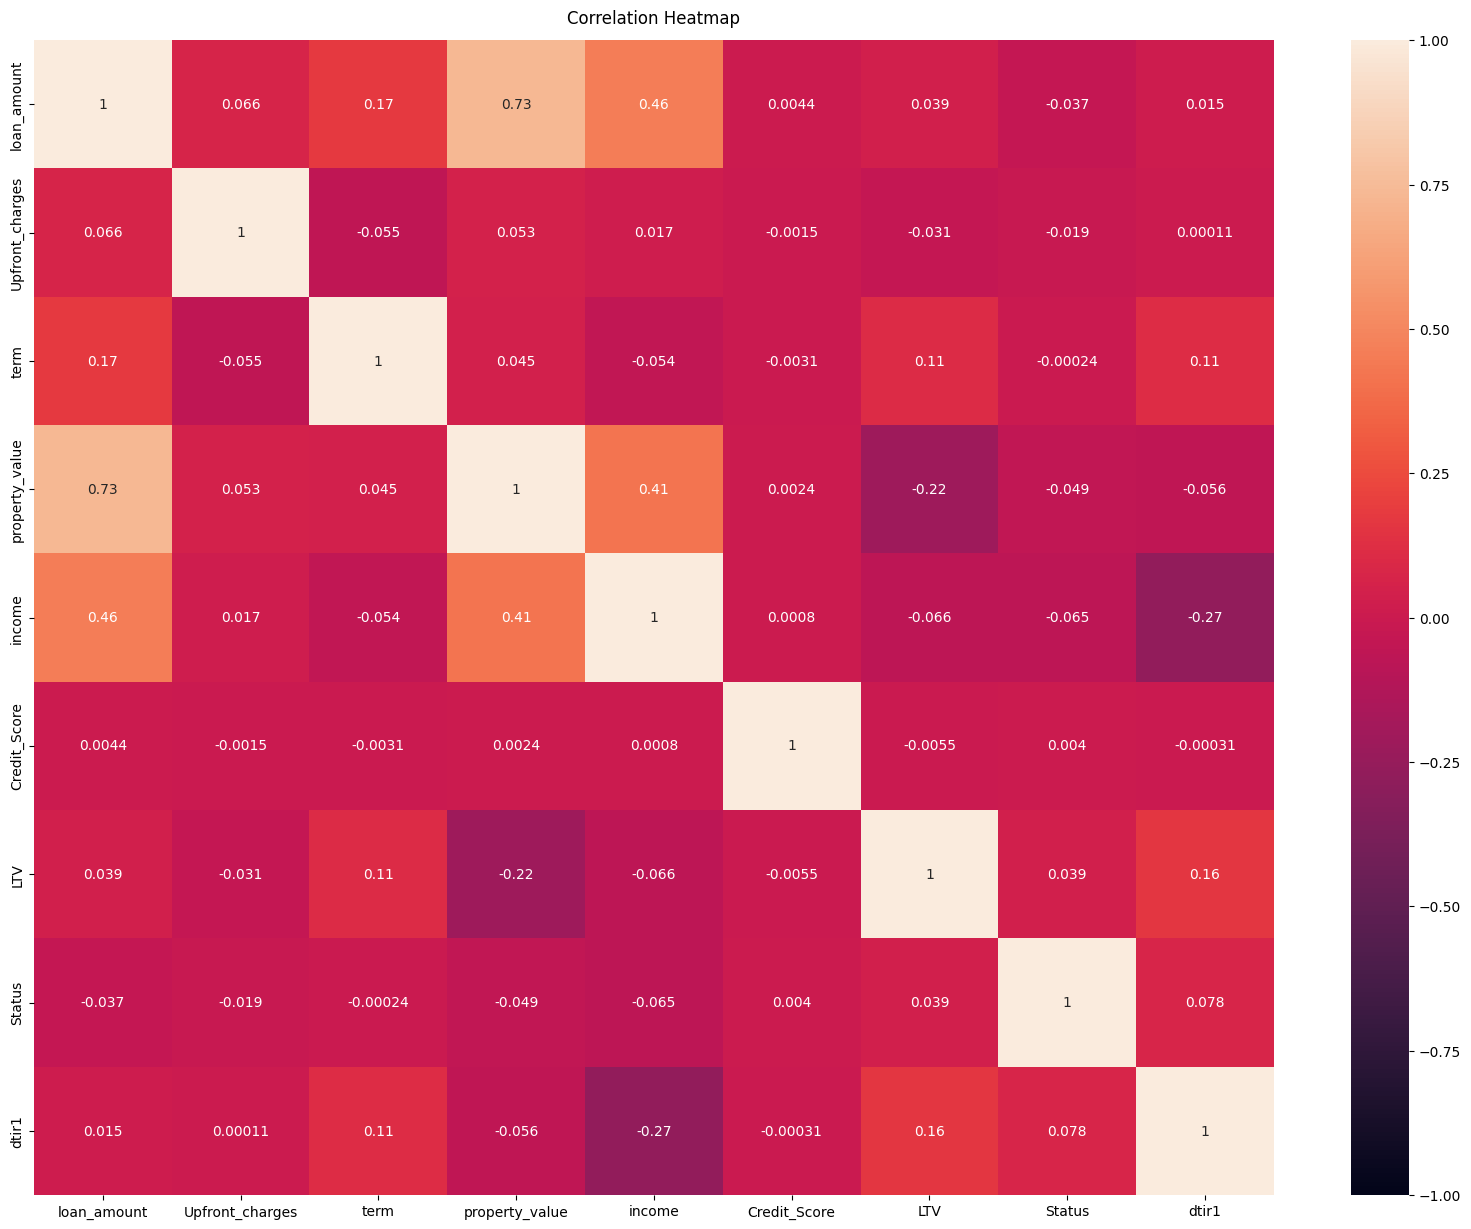

In [113]:
corr = df.drop(columns=["age"],axis=1).corr()
plt.figure(figsize=(20, 15))
heatmap = sb.heatmap(corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [114]:
df.isnull().sum()

loan_amount            0
Upfront_charges    39642
term                  41
property_value     15098
income              9150
Credit_Score           0
age                  200
LTV                15098
Status                 0
dtir1              24121
dtype: int64

In [115]:
df.dtypes

loan_amount          int64
Upfront_charges    float64
term               float64
property_value     float64
income             float64
Credit_Score         int64
age                 object
LTV                float64
Status               int64
dtir1              float64
dtype: object

In [116]:
uc_att_1 = df["Upfront_charges"].fillna(df.groupby('loan_amount')['Upfront_charges'].transform(lambda x: x.mean()))
uc_att_1.isnull().sum()

54

In [117]:
uc_att_2 = df["Upfront_charges"].fillna(df.groupby(['loan_amount','term'])['Upfront_charges'].transform(lambda x: x.mean()))
uc_att_2.isnull().sum()

261

In [118]:
np.max(uc_att_1 - uc_att_2), np.min(uc_att_1 - uc_att_2)

(7812.465, -19690.0)

In [119]:
df["Upfront_charges"] = uc_att_2

In [120]:
df["term"].fillna(df.groupby('loan_amount')['term'].transform(lambda x: x.mode()[0])).isnull().sum()

0

In [121]:
df["term"].fillna(df.groupby('loan_amount')['term'].transform(lambda x: x.mode()[0]),inplace=True)

C:\Users\hskay\AppData\Local\Temp\ipykernel_1020\3484462955.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["term"].fillna(df.groupby('loan_amount')['term'].transform(lambda x: x.mode()[0]),inplace=True)


In [122]:
df["property_value"].fillna(df.groupby('loan_amount')['property_value'].transform(lambda x: x.mean())).isnull().sum()   

7

In [123]:
df["property_value"].fillna(df.groupby('loan_amount')['property_value'].transform(lambda x: x.mean()),inplace=True)   

C:\Users\hskay\AppData\Local\Temp\ipykernel_1020\464885817.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["property_value"].fillna(df.groupby('loan_amount')['property_value'].transform(lambda x: x.mean()),inplace=True)


In [124]:
df["income"].fillna(df.groupby('property_value')['income'].transform(lambda x: x.mean())).isnull().sum()

6

In [125]:
df["income"].fillna(df.groupby('property_value')['income'].transform(lambda x: x.mean()),inplace=True)

C:\Users\hskay\AppData\Local\Temp\ipykernel_1020\3743406681.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["income"].fillna(df.groupby('property_value')['income'].transform(lambda x: x.mean()),inplace=True)


In [126]:
df["age"].fillna(df.groupby('property_value')['age'].transform(lambda x: x.mode()[0])).isnull().sum()

0

In [127]:
df["age"].fillna(df.groupby('property_value')['age'].transform(lambda x: x.mode()[0]),inplace=True)

C:\Users\hskay\AppData\Local\Temp\ipykernel_1020\3001916602.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df.groupby('property_value')['age'].transform(lambda x: x.mode()[0]),inplace=True)


In [128]:
df["LTV"].fillna(df.groupby('term')['LTV'].transform(lambda x: x.mean())).isnull().sum()

1

In [129]:
df["LTV"].fillna(df.groupby('term')['LTV'].transform(lambda x: x.mean()),inplace=True)

C:\Users\hskay\AppData\Local\Temp\ipykernel_1020\841890541.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["LTV"].fillna(df.groupby('term')['LTV'].transform(lambda x: x.mean()),inplace=True)


In [130]:
df["dtir1"].fillna(df.groupby('loan_amount')['dtir1'].transform(lambda x: x.mean())).isnull().sum()

7

In [131]:
df["dtir1"].fillna(df.groupby('loan_amount')['dtir1'].transform(lambda x: x.mean()),inplace=True)

C:\Users\hskay\AppData\Local\Temp\ipykernel_1020\2025548805.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["dtir1"].fillna(df.groupby('loan_amount')['dtir1'].transform(lambda x: x.mean()),inplace=True)


In [132]:
df.isnull().sum()

loan_amount          0
Upfront_charges    261
term                 0
property_value       7
income               6
Credit_Score         0
age                  0
LTV                  1
Status               0
dtir1                7
dtype: int64

In [133]:
df["Upfront_charges"]=df["Upfront_charges"].fillna(df["Upfront_charges"].mean())
df["property_value"]=df["property_value"].fillna(df["property_value"].mean())
df["income"]=df["income"].fillna(df["income"].mean())
df["LTV"]=df["LTV"].fillna(df["LTV"].mean())
df["dtir1"]=df["dtir1"].fillna(df["dtir1"].mean())

In [134]:
df.isnull().sum().sum()

0

In [135]:
del df_old
del df_main

cols = list(df.columns[:-2])
cols.extend([df.columns[-1],df.columns[-2]])

df = df[cols]
df.columns = df.columns.str.lower()
df_main = df.copy()

## 2.3 Outlier Analysis
Identify and handle outliers in the data.Plot features using boxplots to visualize outliers.

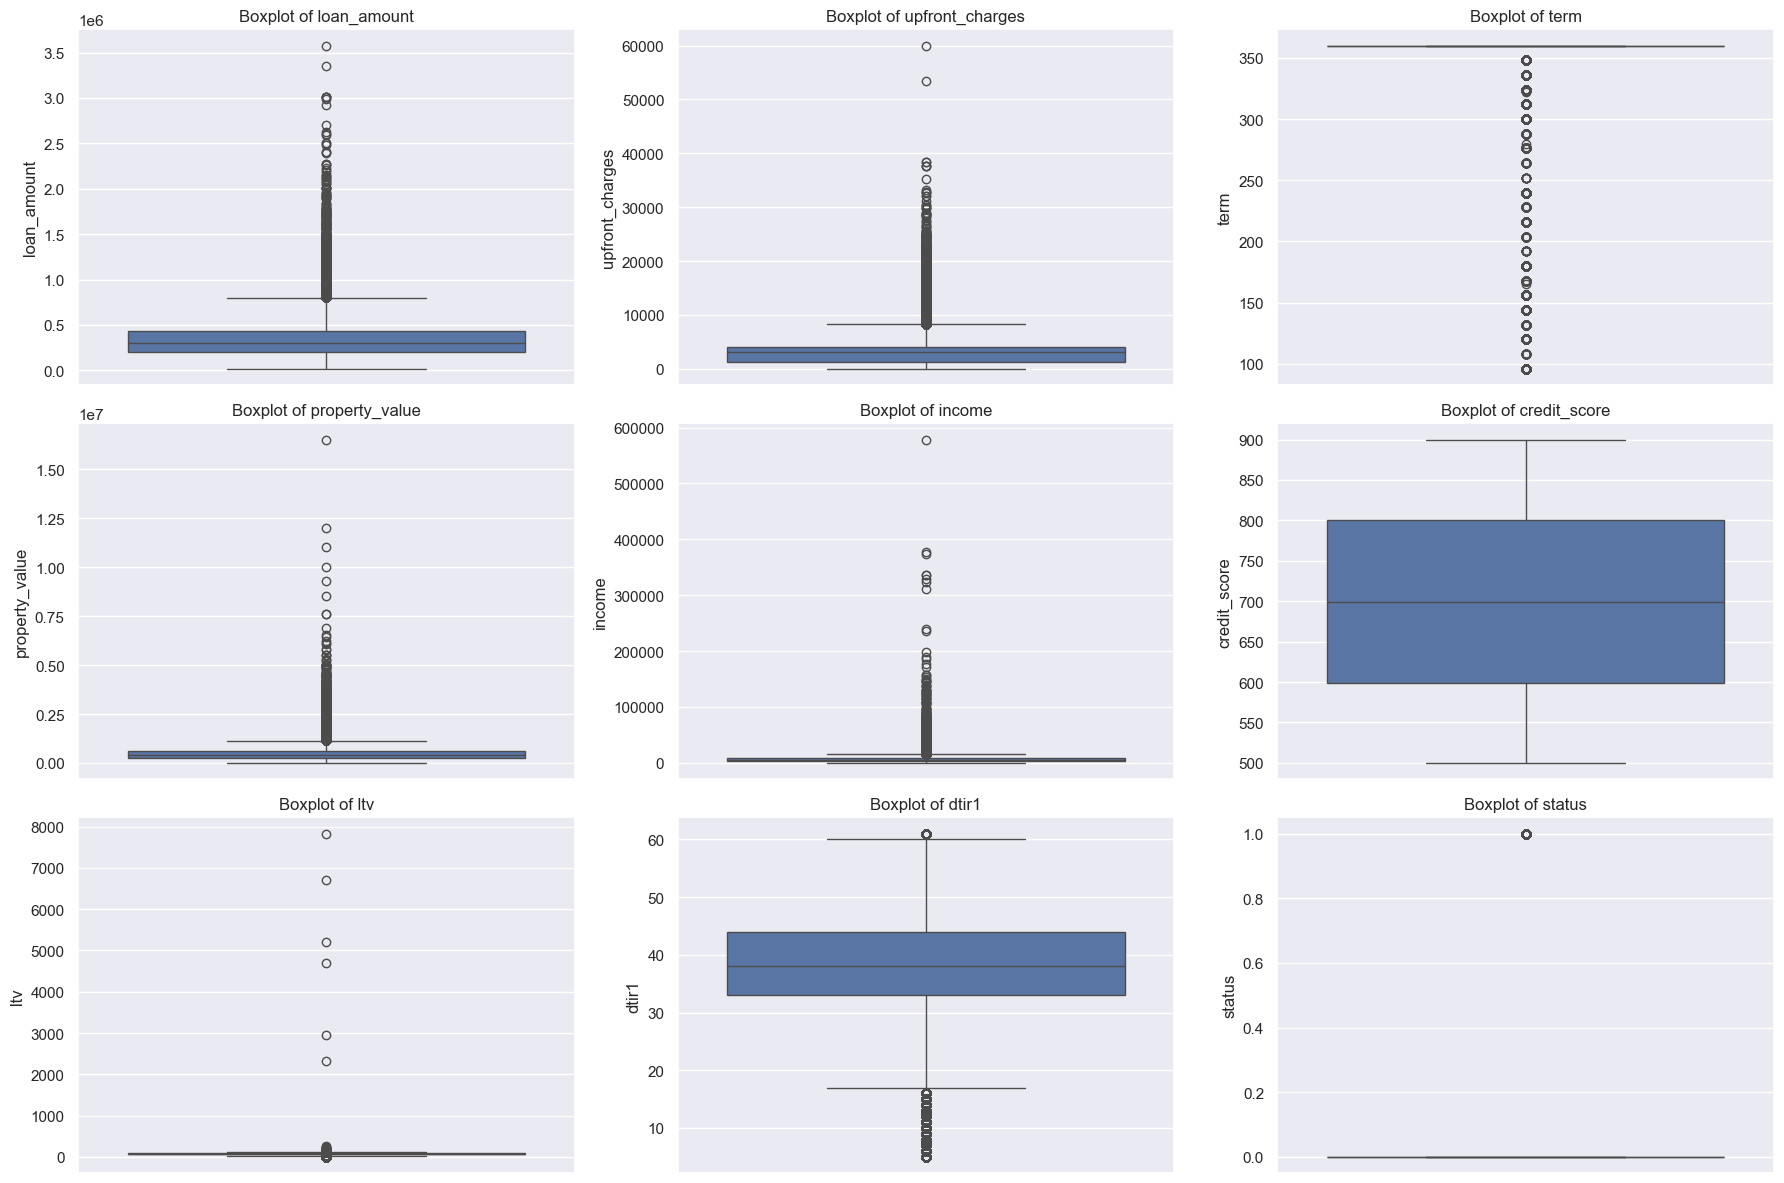

In [136]:
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(18, 12))  
sb.set_theme(style='darkgrid')

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)  
    sb.boxplot(y=col, data=df)
    plt.title(f'Boxplot of {col}')  

plt.tight_layout()  
plt.show()

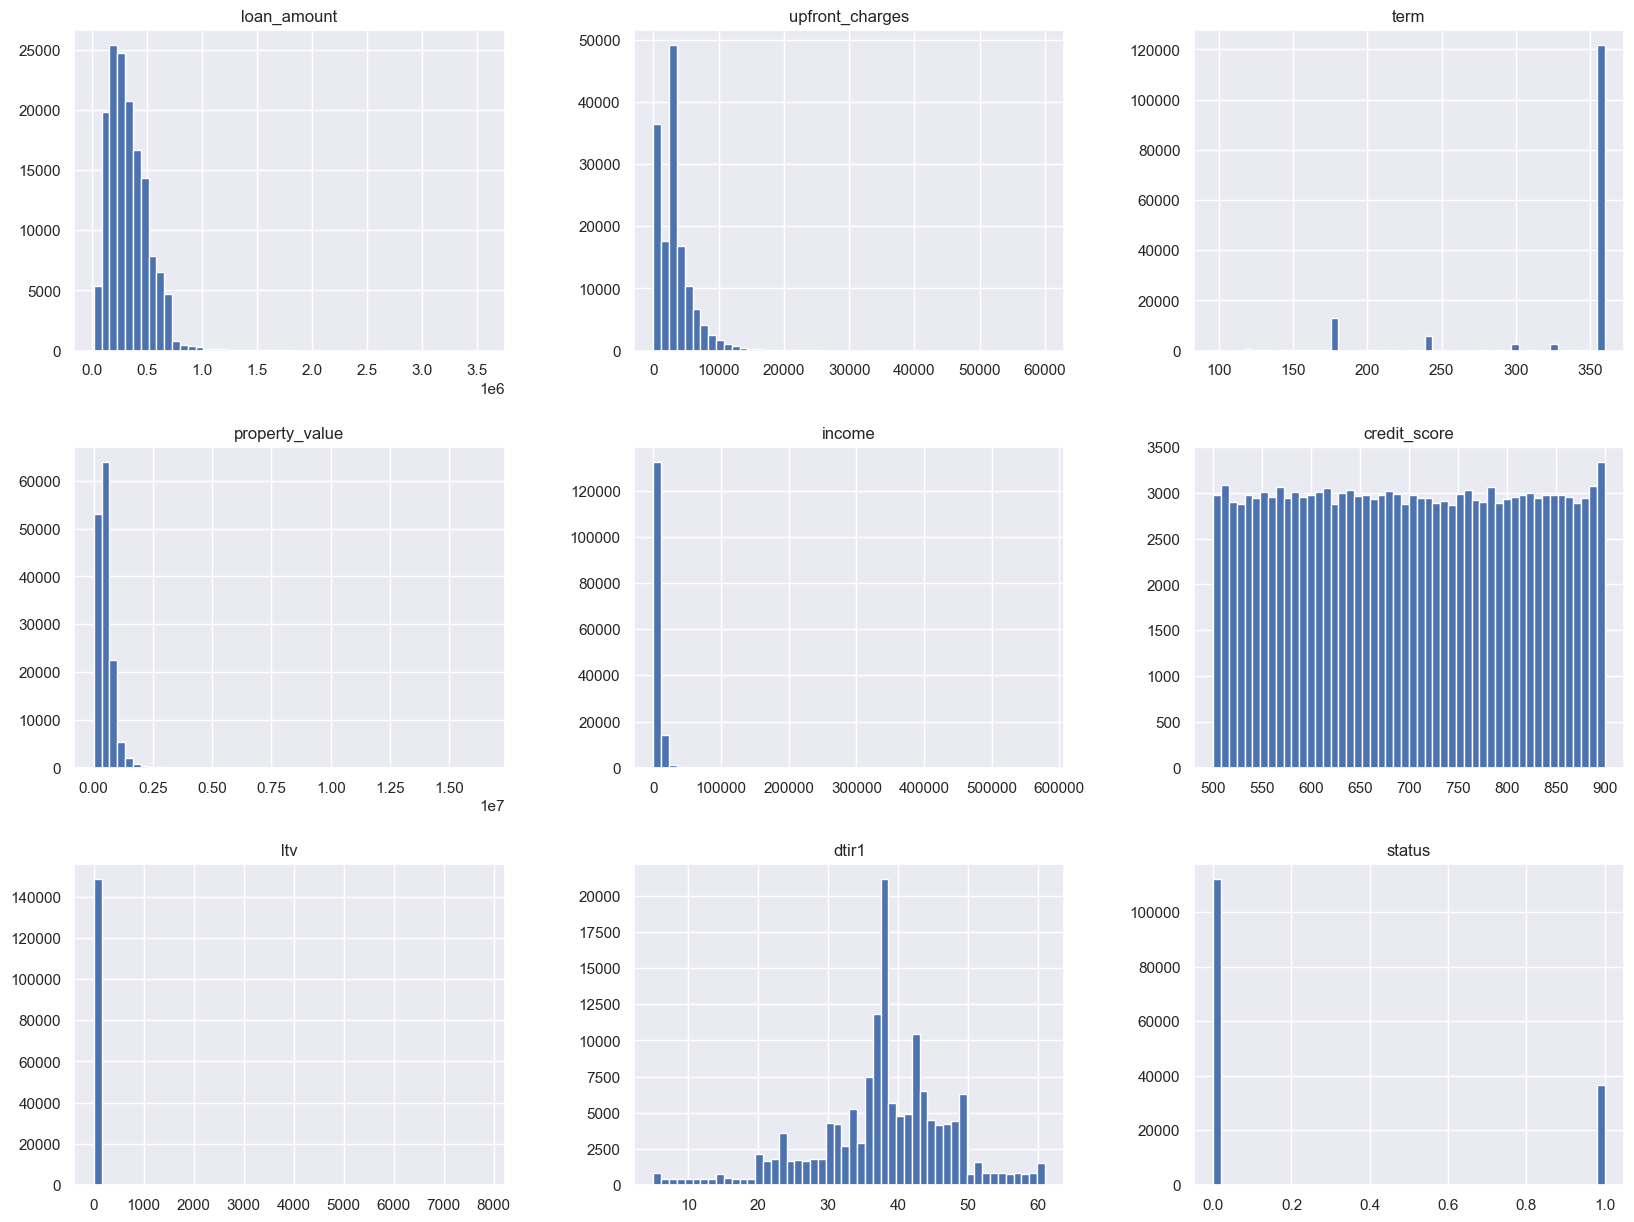

In [137]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

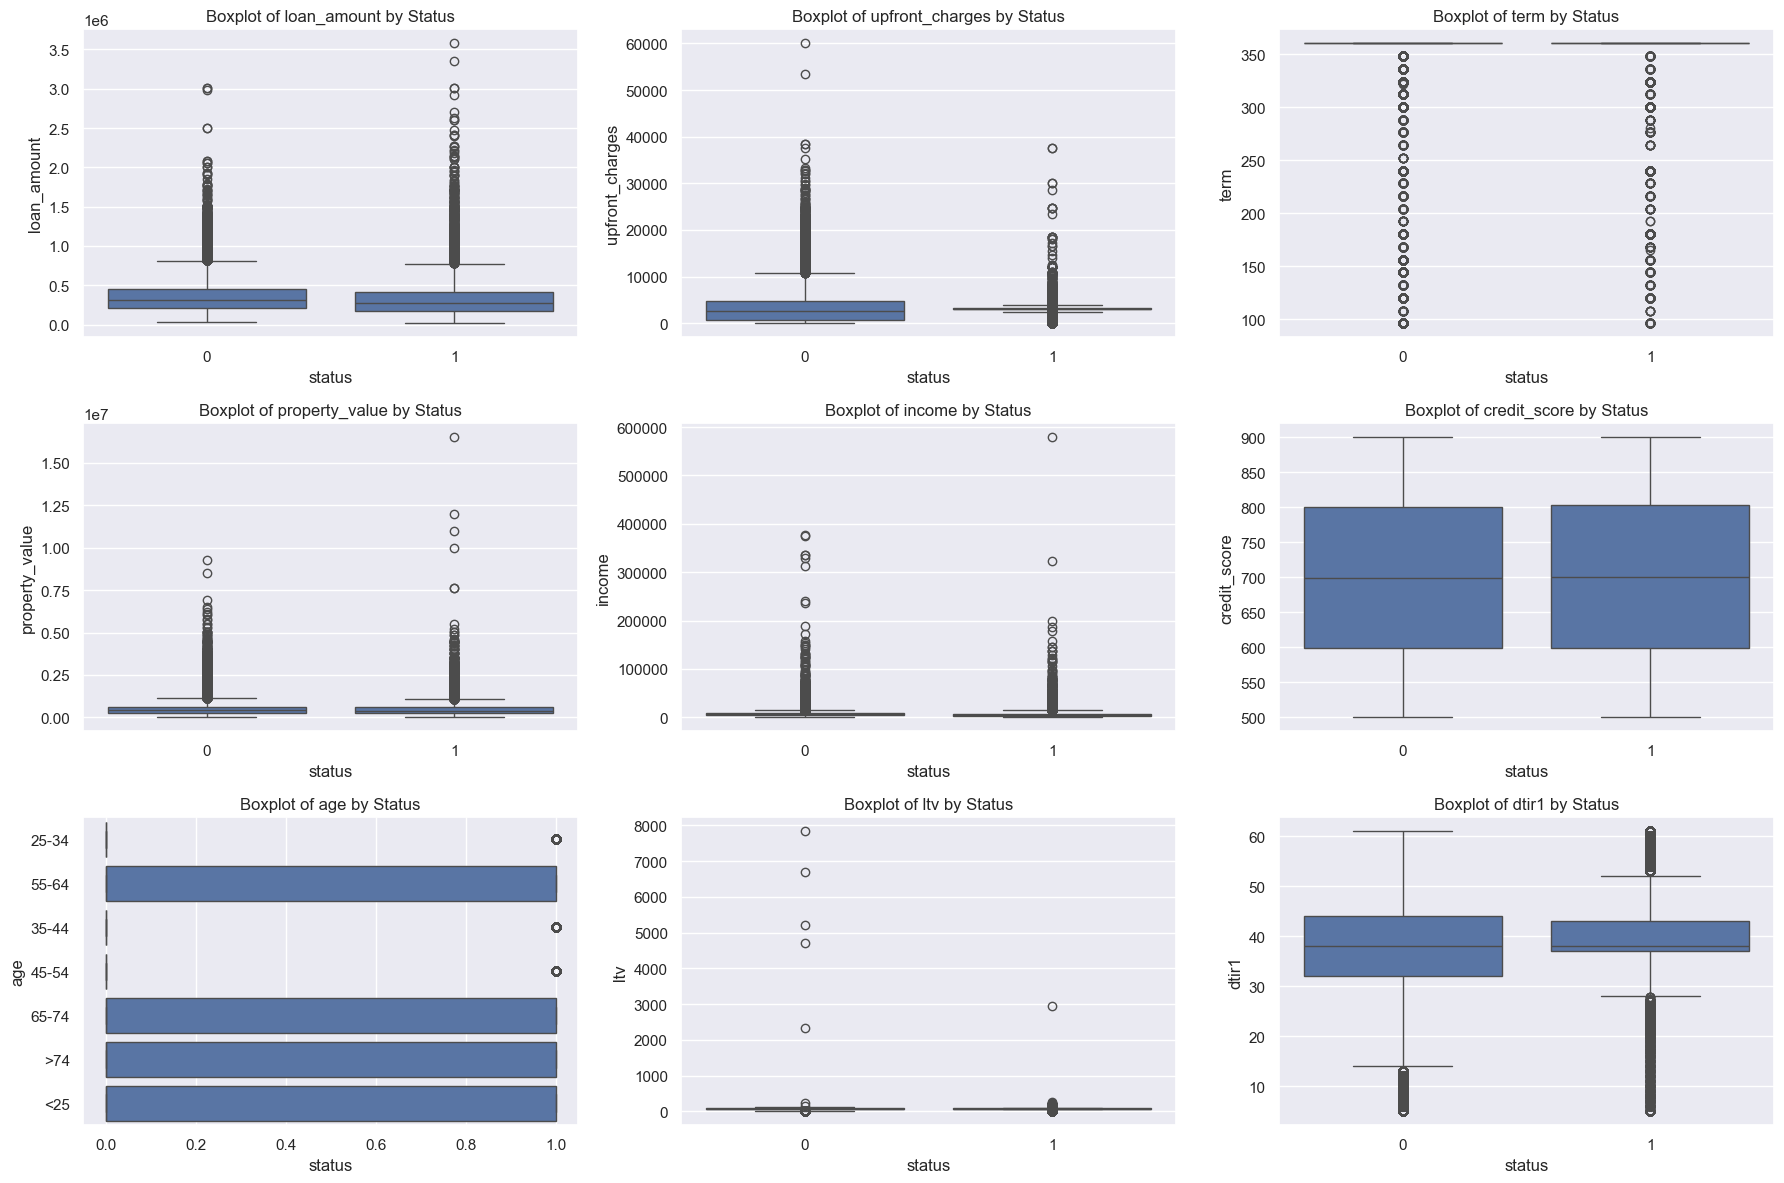

In [138]:
plt.figure(figsize=(18, 12))  
sb.set_theme(style='darkgrid')

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)  
    sb.boxplot(x='status', y=col, data=df)
    plt.title(f'Boxplot of {col} by Status')  

plt.tight_layout()  
plt.show()

## 2.4 Feature Engineering (if needed)
Transform or create new features to improve model performance

In [139]:
df_2 = df.copy()
df_2["age"] = df["age"].astype('category').cat.codes

In [140]:
y = df_2["status"].copy()
X = df_2.drop("status", axis=1).copy()
del df_2

In [141]:
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(X, y)
df_smote = pd.concat([X_smote, y_smote], axis=1)
np.bincount(y_smote)

array([112031, 112031], dtype=int64)

In [142]:
df_smote.head()

loan_amount  upfront_charges   term  property_value   income  credit_score  \
0       116500      2570.136346  360.0   118000.000000   1740.0           758   
1       206500      3002.893204  360.0   350858.517806   4980.0           552   
2       406500       595.000000  360.0   508000.000000   9480.0           834   
3       456500      2977.392940  360.0   658000.000000  11880.0           587   
4       696500         0.000000  360.0   758000.000000  10440.0           602   

   age        ltv      dtir1  status  
0    0  98.728814  45.000000       1  
1    3  74.471918  37.438237       1  
2    1  80.019685  46.000000       0  
3    2  69.376900  42.000000       0  
4    0  91.886544  39.000000       0

In [143]:
X_smote["age"].value_counts()

age
2    56596
1    52368
3    48999
0    28495
4    26105
6     7539
5     3960
Name: count, dtype: int64

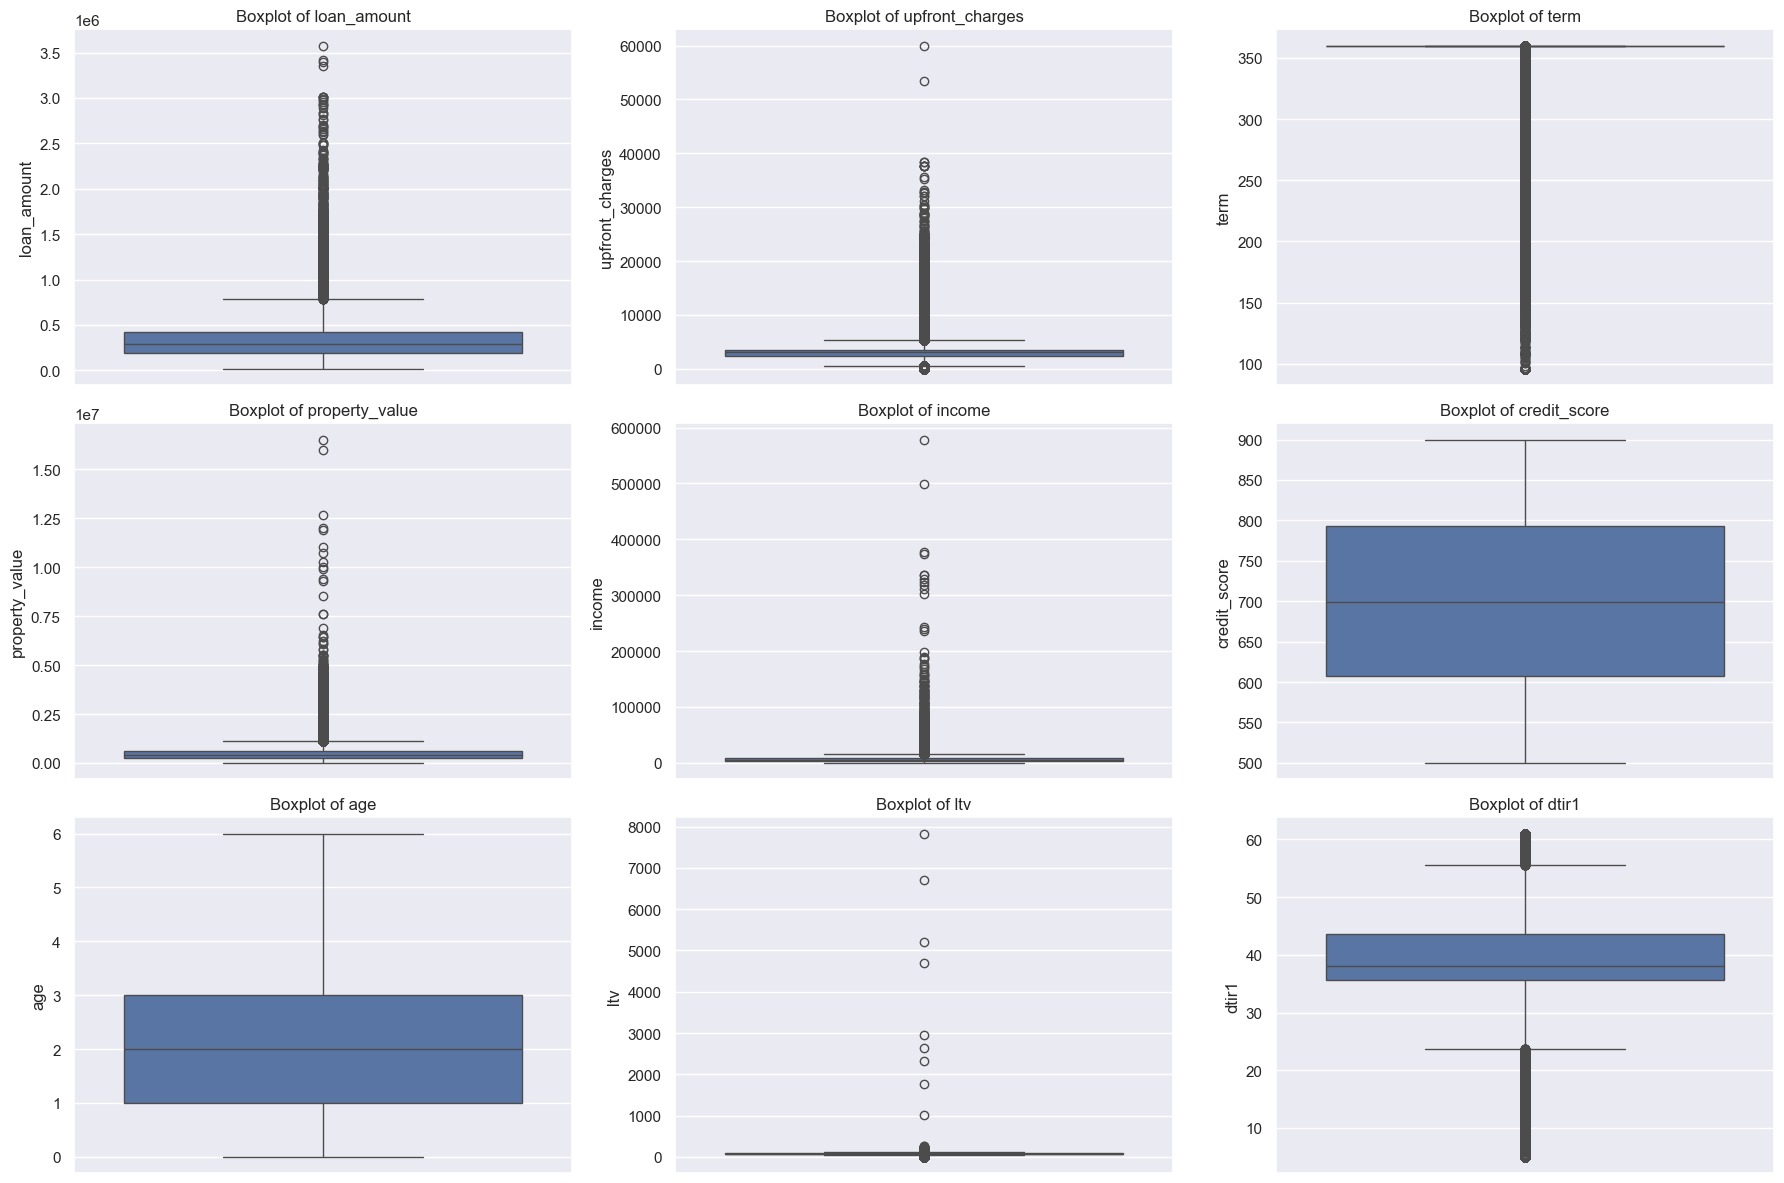

In [144]:
plt.figure(figsize=(18, 12))  
sb.set_theme(style='darkgrid')

for i, col in enumerate(df_smote.columns[:-1]):
    plt.subplot(3, 3, i + 1)  
    sb.boxplot(y=col, data=df_smote)
    plt.title(f'Boxplot of {col}')  

plt.tight_layout()  
plt.show()

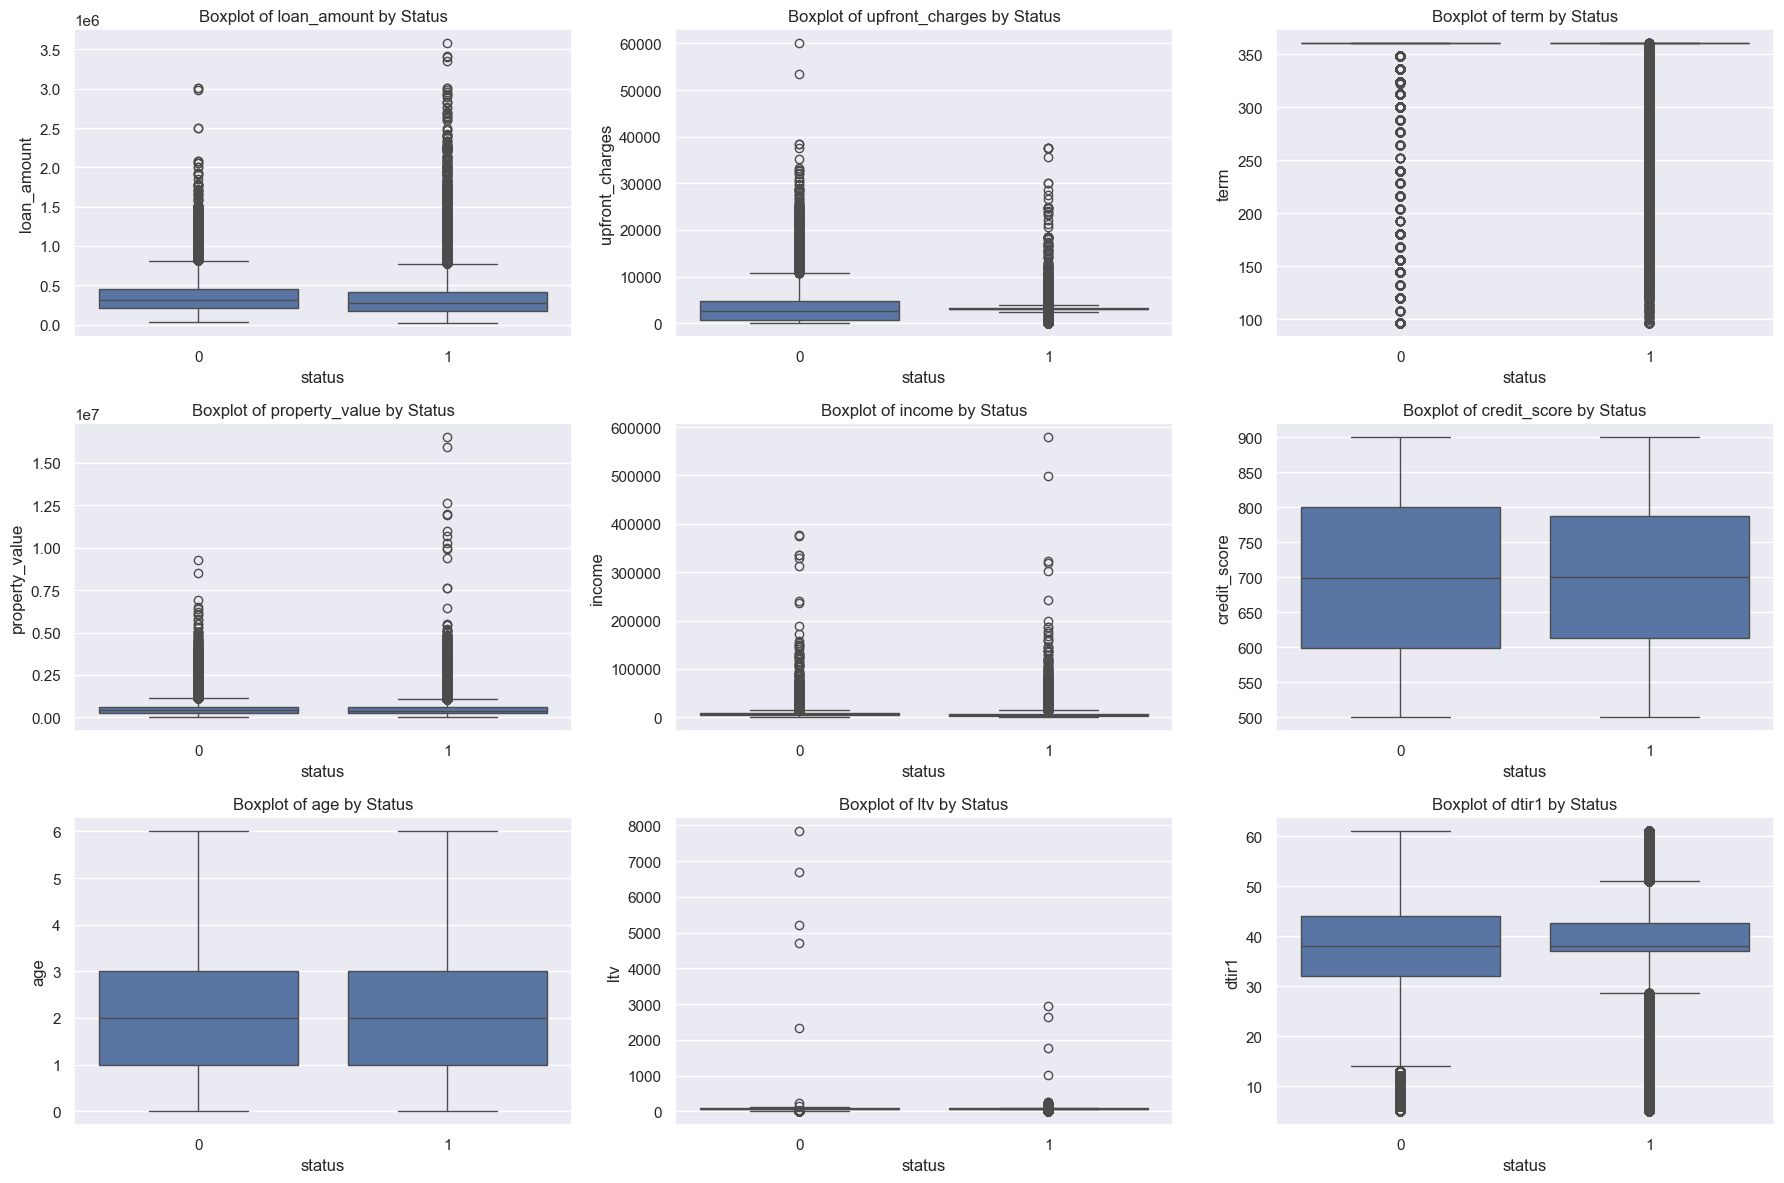

In [145]:
plt.figure(figsize=(18, 12))  
sb.set_theme(style='darkgrid')

for i, col in enumerate(df_smote.columns[:-1]):
    plt.subplot(3, 3, i + 1)  
    sb.boxplot(x='status', y=col, data=df_smote)
    plt.title(f'Boxplot of {col} by Status')  

plt.tight_layout()  
plt.show()

In [146]:
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)
df_adasyn = pd.concat([X_adasyn, y_adasyn], axis=1)
np.bincount(y_adasyn)

array([112031, 110745], dtype=int64)

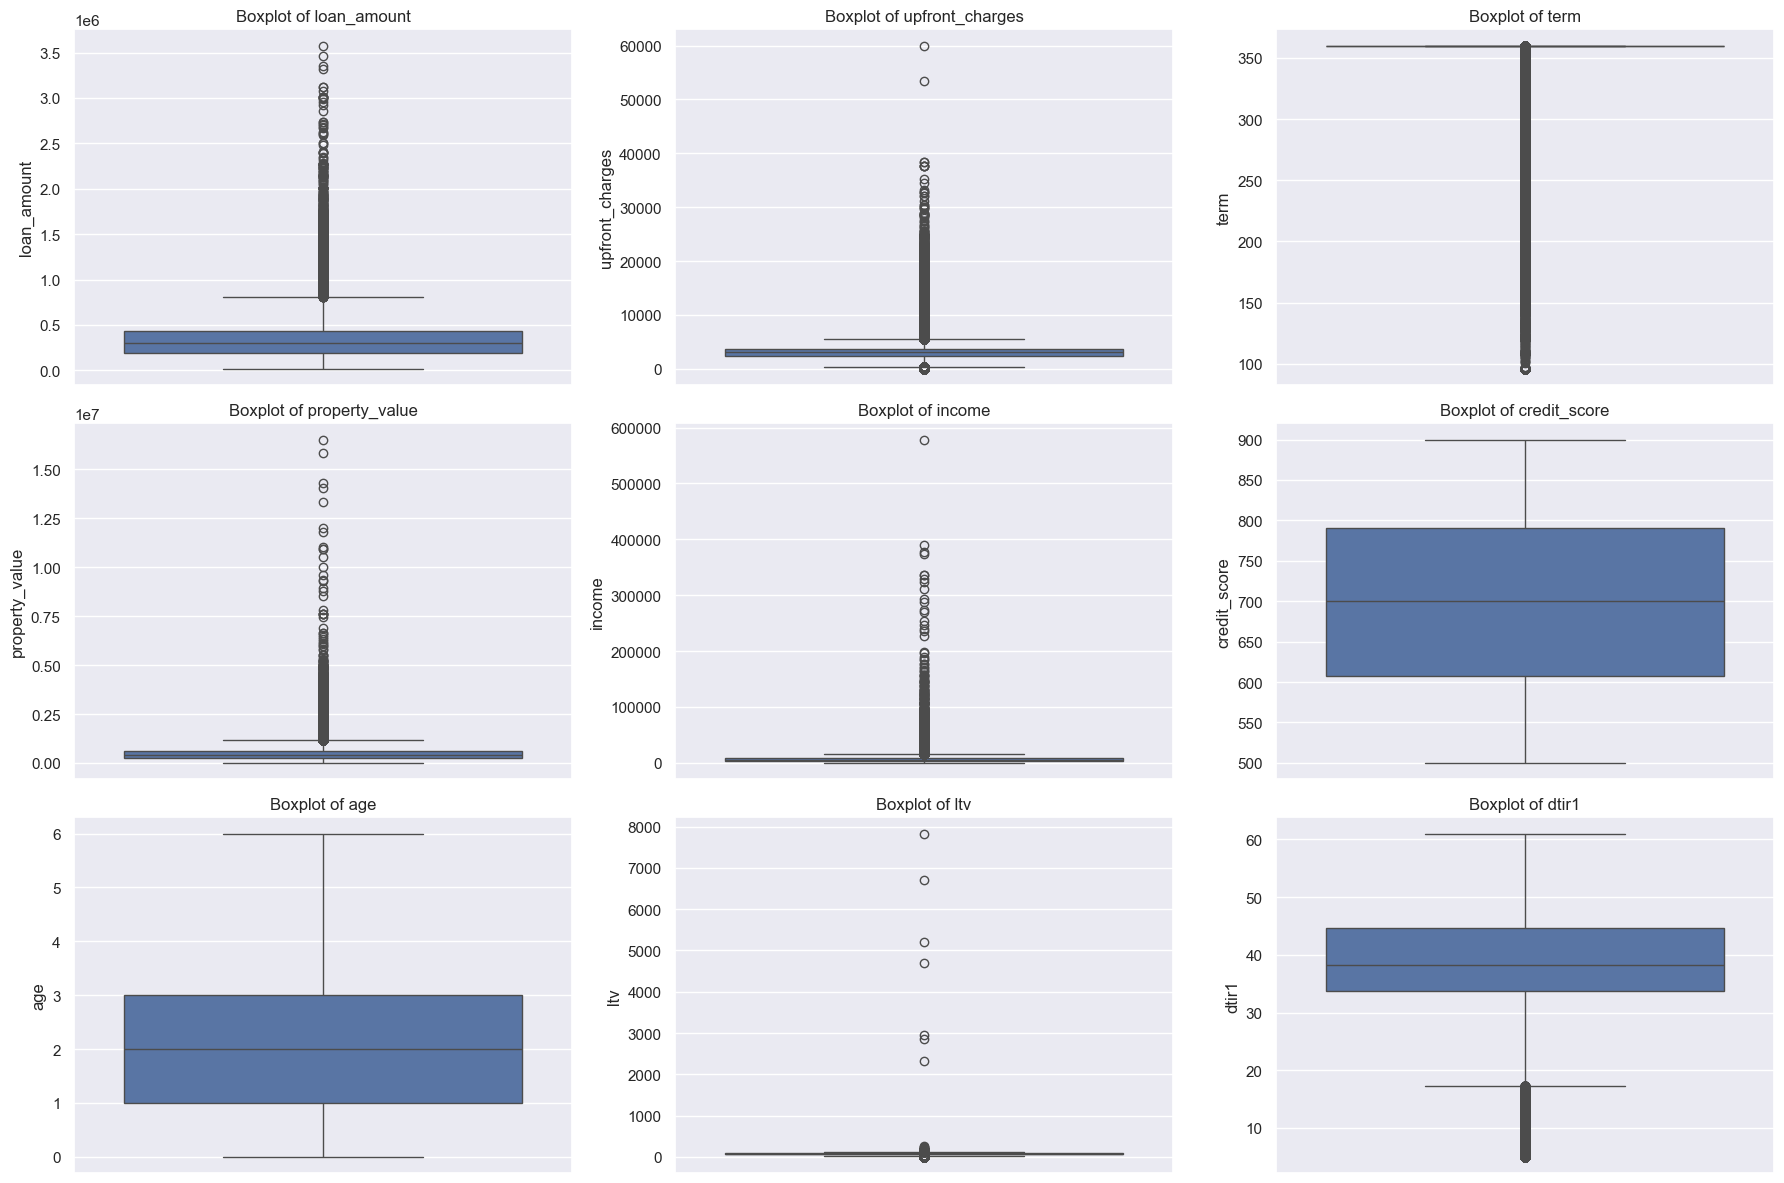

In [147]:
plt.figure(figsize=(18, 12))  
sb.set_theme(style='darkgrid')

for i, col in enumerate(df_adasyn.columns[:-1]):
    plt.subplot(3, 3, i + 1)  
    sb.boxplot(y=col, data=df_adasyn)
    plt.title(f'Boxplot of {col}')  

plt.tight_layout()  
plt.show()

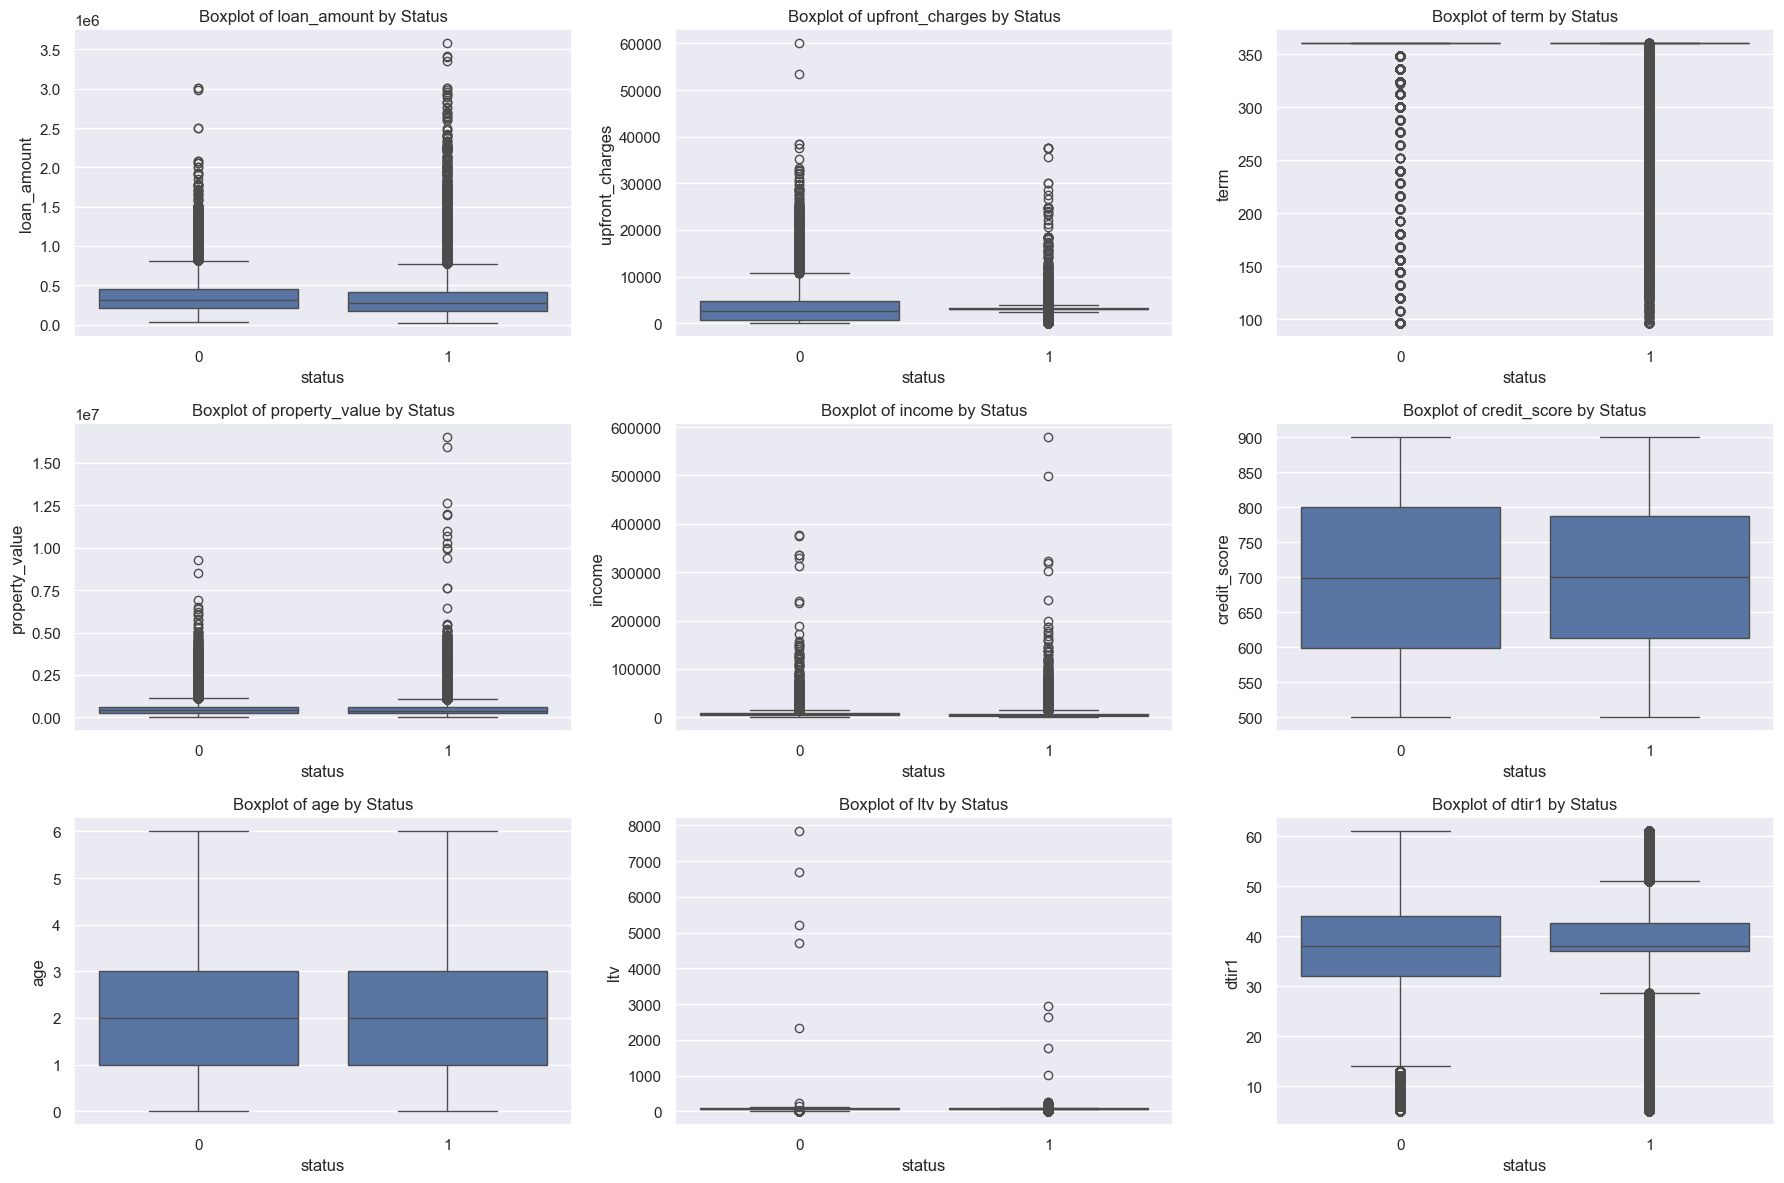

In [148]:
plt.figure(figsize=(18, 12))  
sb.set_theme(style='darkgrid')

for i, col in enumerate(df_smote.columns[:-1]):
    plt.subplot(3, 3, i + 1)  
    sb.boxplot(x='status', y=col, data=df_smote)
    plt.title(f'Boxplot of {col} by Status')  

plt.tight_layout()  
plt.show()

In [149]:
X_adasyn["age"].value_counts()

age
2    57880
1    51099
3    49976
0    26749
4    25671
6     7544
5     3857
Name: count, dtype: int64

In [150]:
under_sampler = RandomUnderSampler(random_state=42)
X_under, y_under = under_sampler.fit_resample(X, y)
df_under = pd.concat([X_under, y_under], axis=1)
np.bincount(y_under)

array([36639, 36639], dtype=int64)

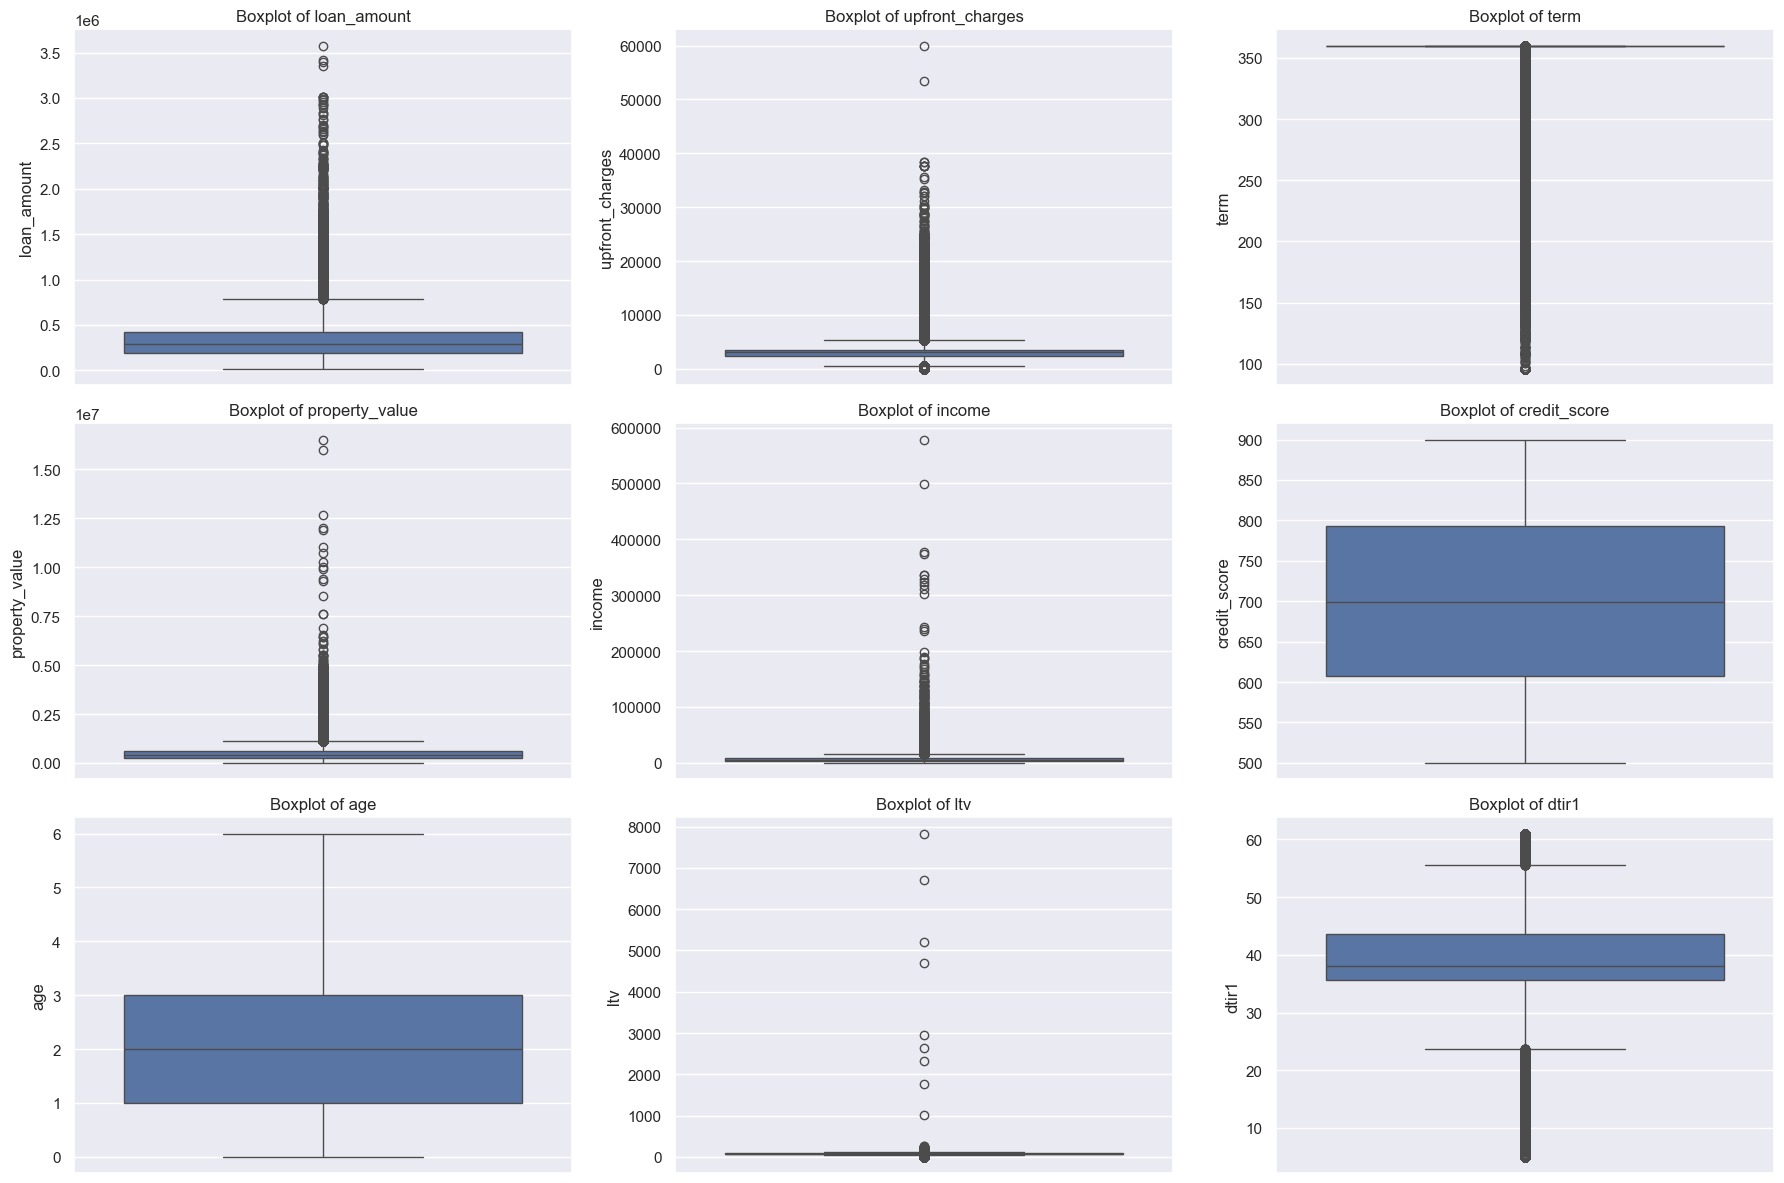

In [151]:
plt.figure(figsize=(18, 12))  
sb.set_theme(style='darkgrid')

for i, col in enumerate(df_smote.columns[:-1]):
    plt.subplot(3, 3, i + 1)  
    sb.boxplot(y=col, data=df_smote)
    plt.title(f'Boxplot of {col}')  

plt.tight_layout()  
plt.show()

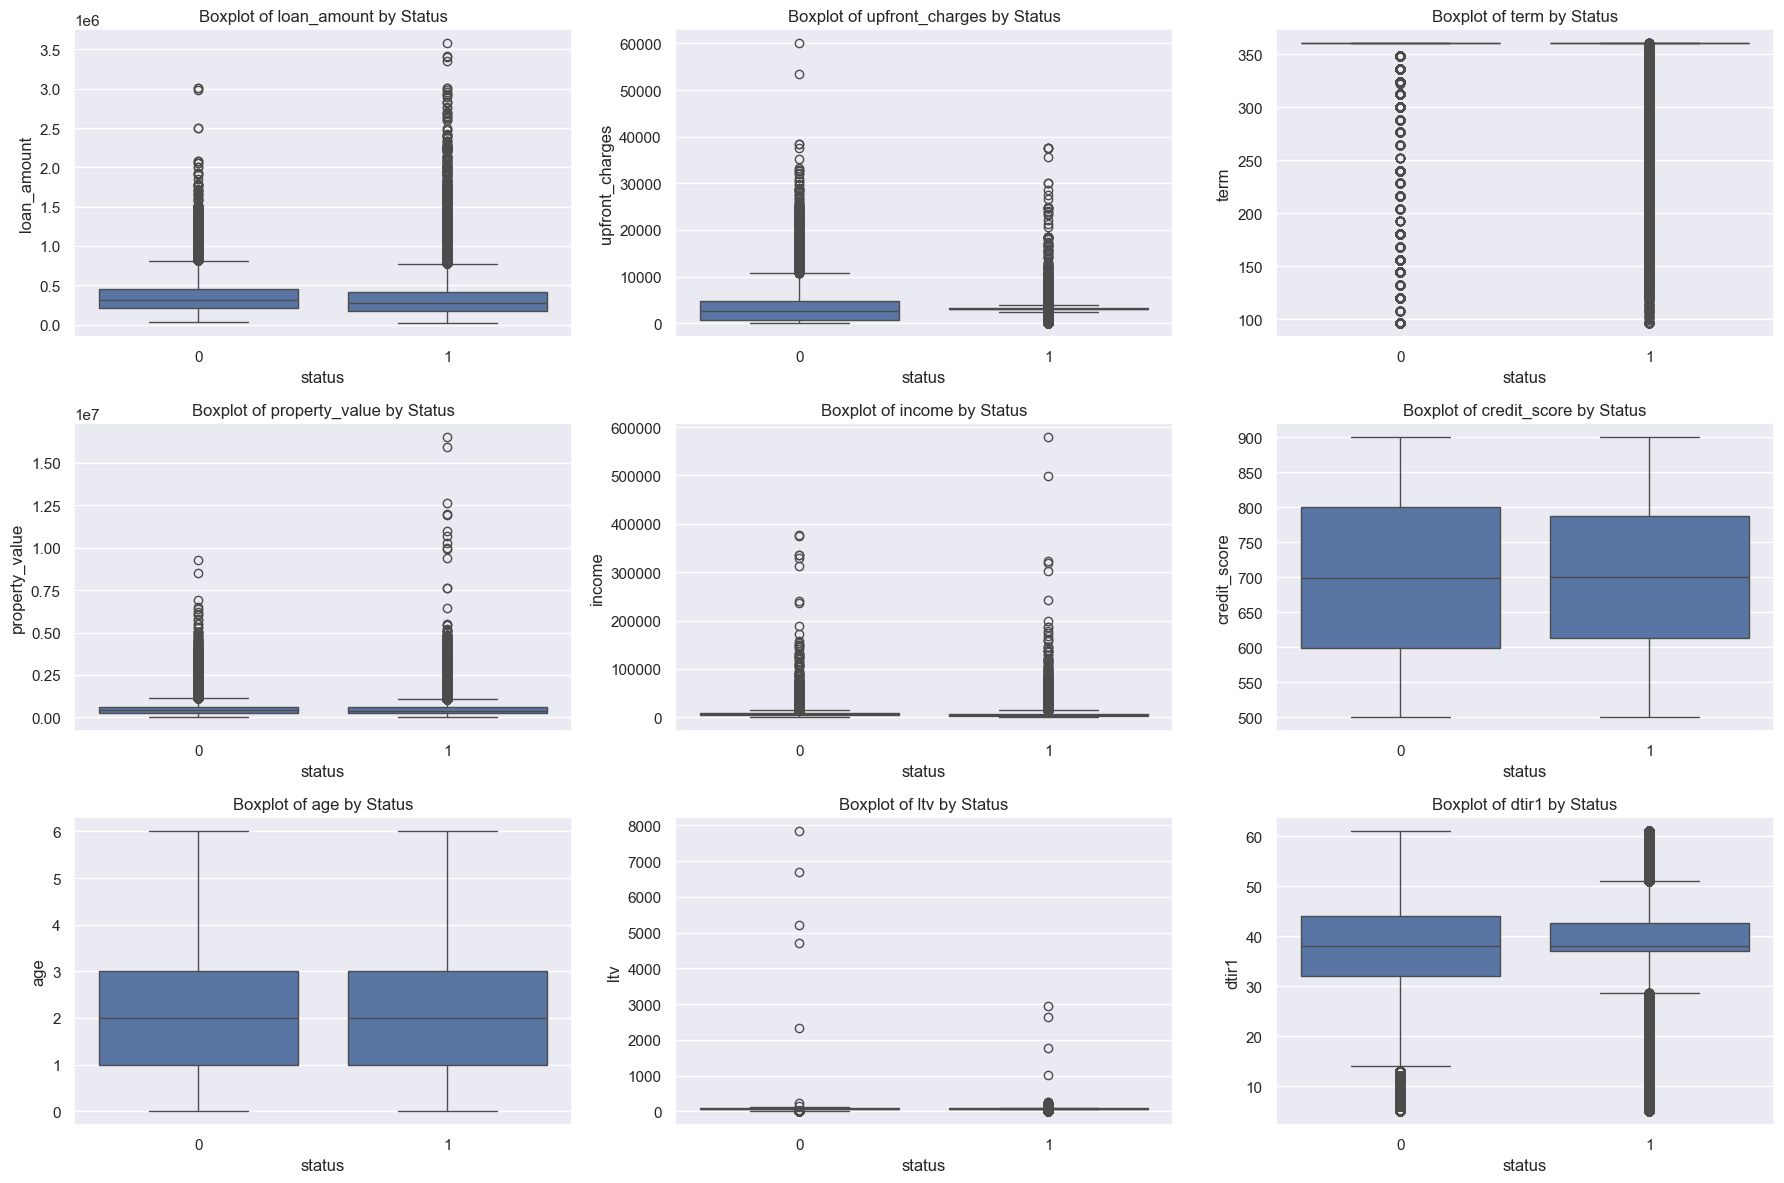

In [152]:
plt.figure(figsize=(18, 12))  
sb.set_theme(style='darkgrid')

for i, col in enumerate(df_smote.columns[:-1]):
    plt.subplot(3, 3, i + 1)  
    sb.boxplot(x='status', y=col, data=df_smote)
    plt.title(f'Boxplot of {col} by Status')  

plt.tight_layout()  
plt.show()

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Exploratory Data Analysis (EDA)</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## 3.1 Data Visualization
Visualize the data to identify trends, patterns, or anomalies. Suggested visualizations:

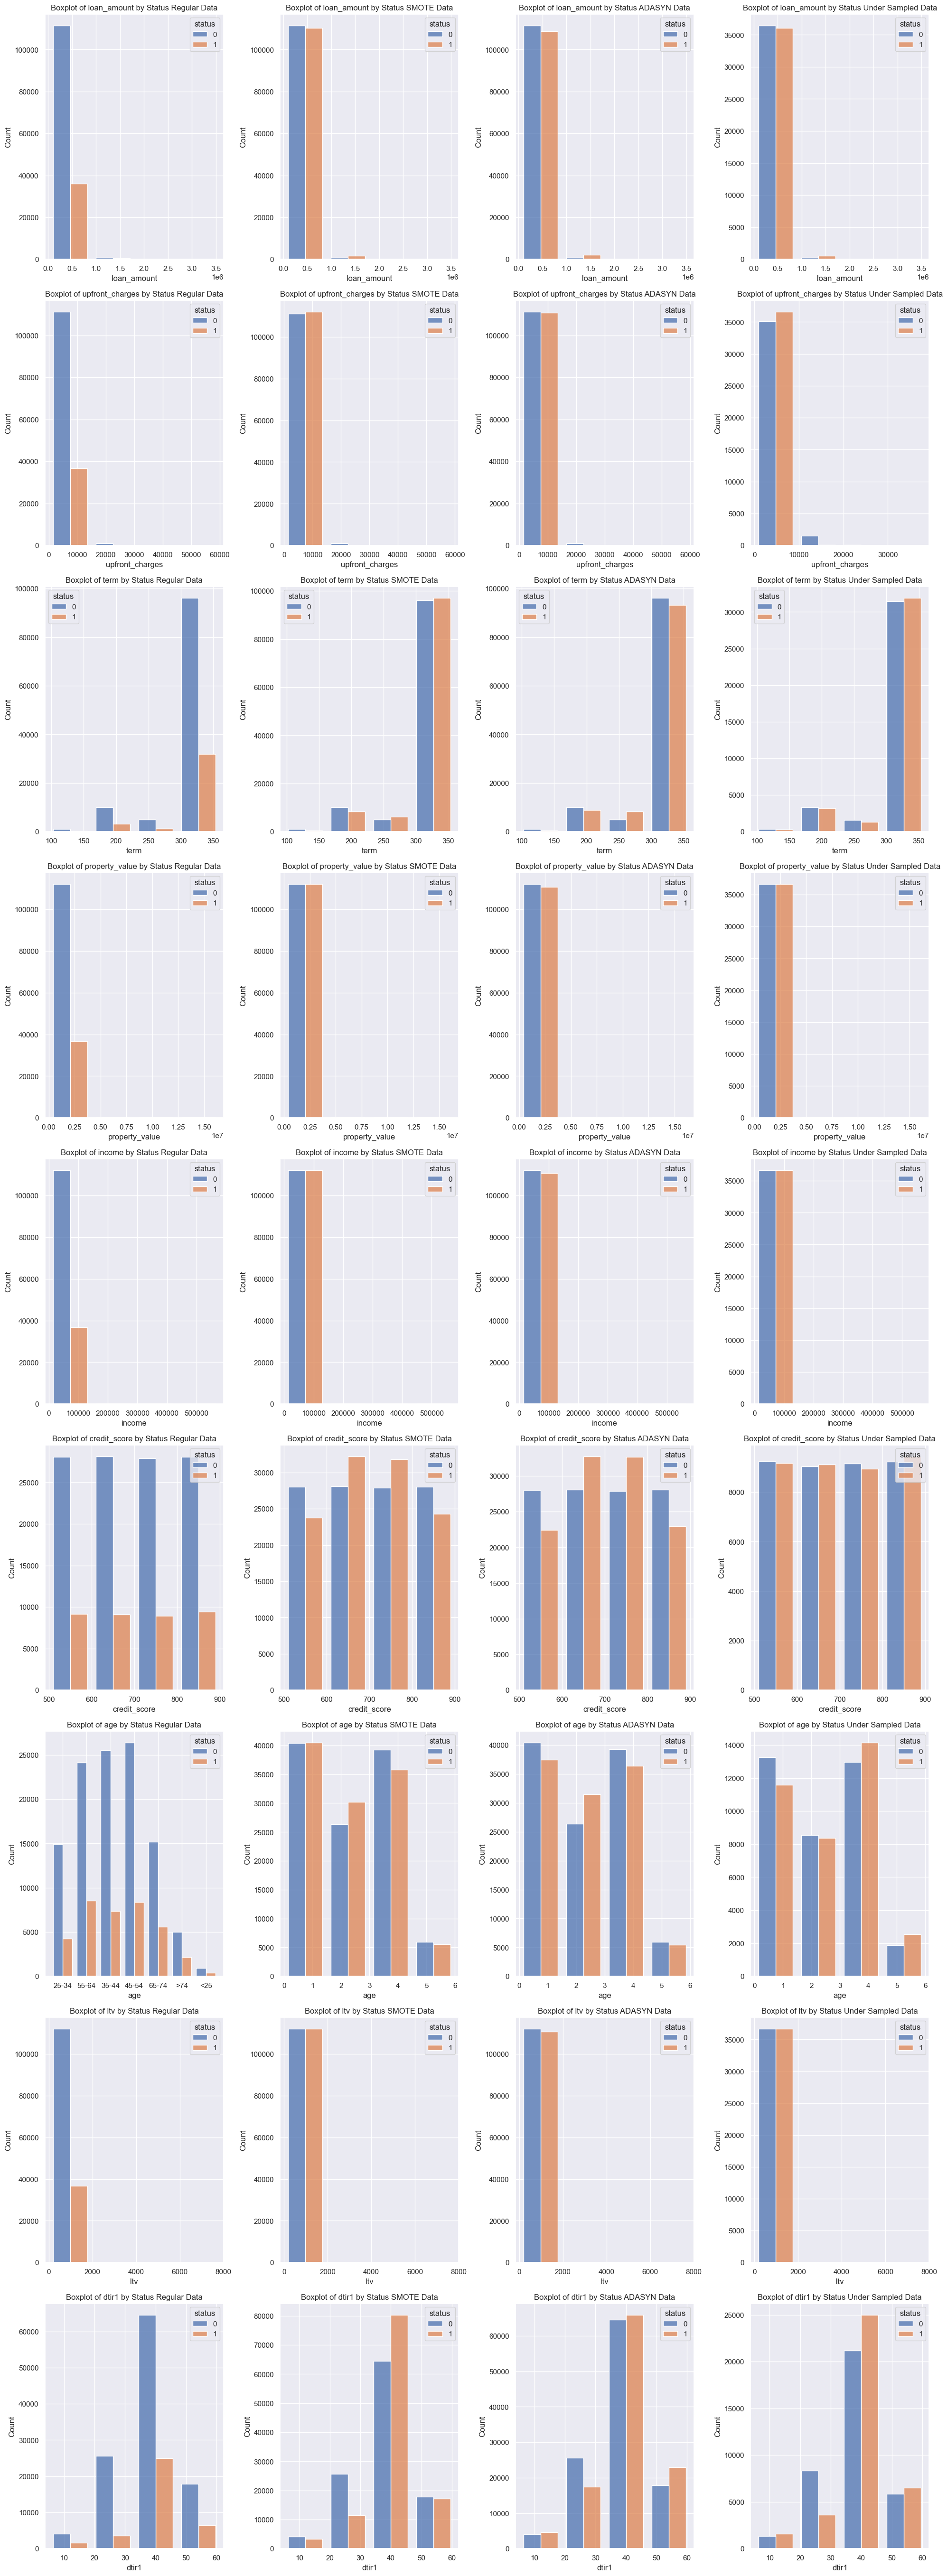

In [153]:
plt.figure(figsize=(20, 60))  
sb.set_theme(style='darkgrid')

df_sets = [df, df_smote, df_adasyn, df_under]
titles = ['Regular Data', 'SMOTE Data', 'ADASYN Data', 'Under Sampled Data']

for i,col in enumerate(df.columns[:-1]):
    for j,title in enumerate(titles):
        plt.subplot(10, 4, i*4 + j+1)  
        sb.histplot(data=df_sets[j], x=col, hue="status", multiple="dodge", shrink=.8, bins=4)
        plt.title('Boxplot of {} by Status {}'.format(col,title))  
        

plt.tight_layout()  
plt.show()

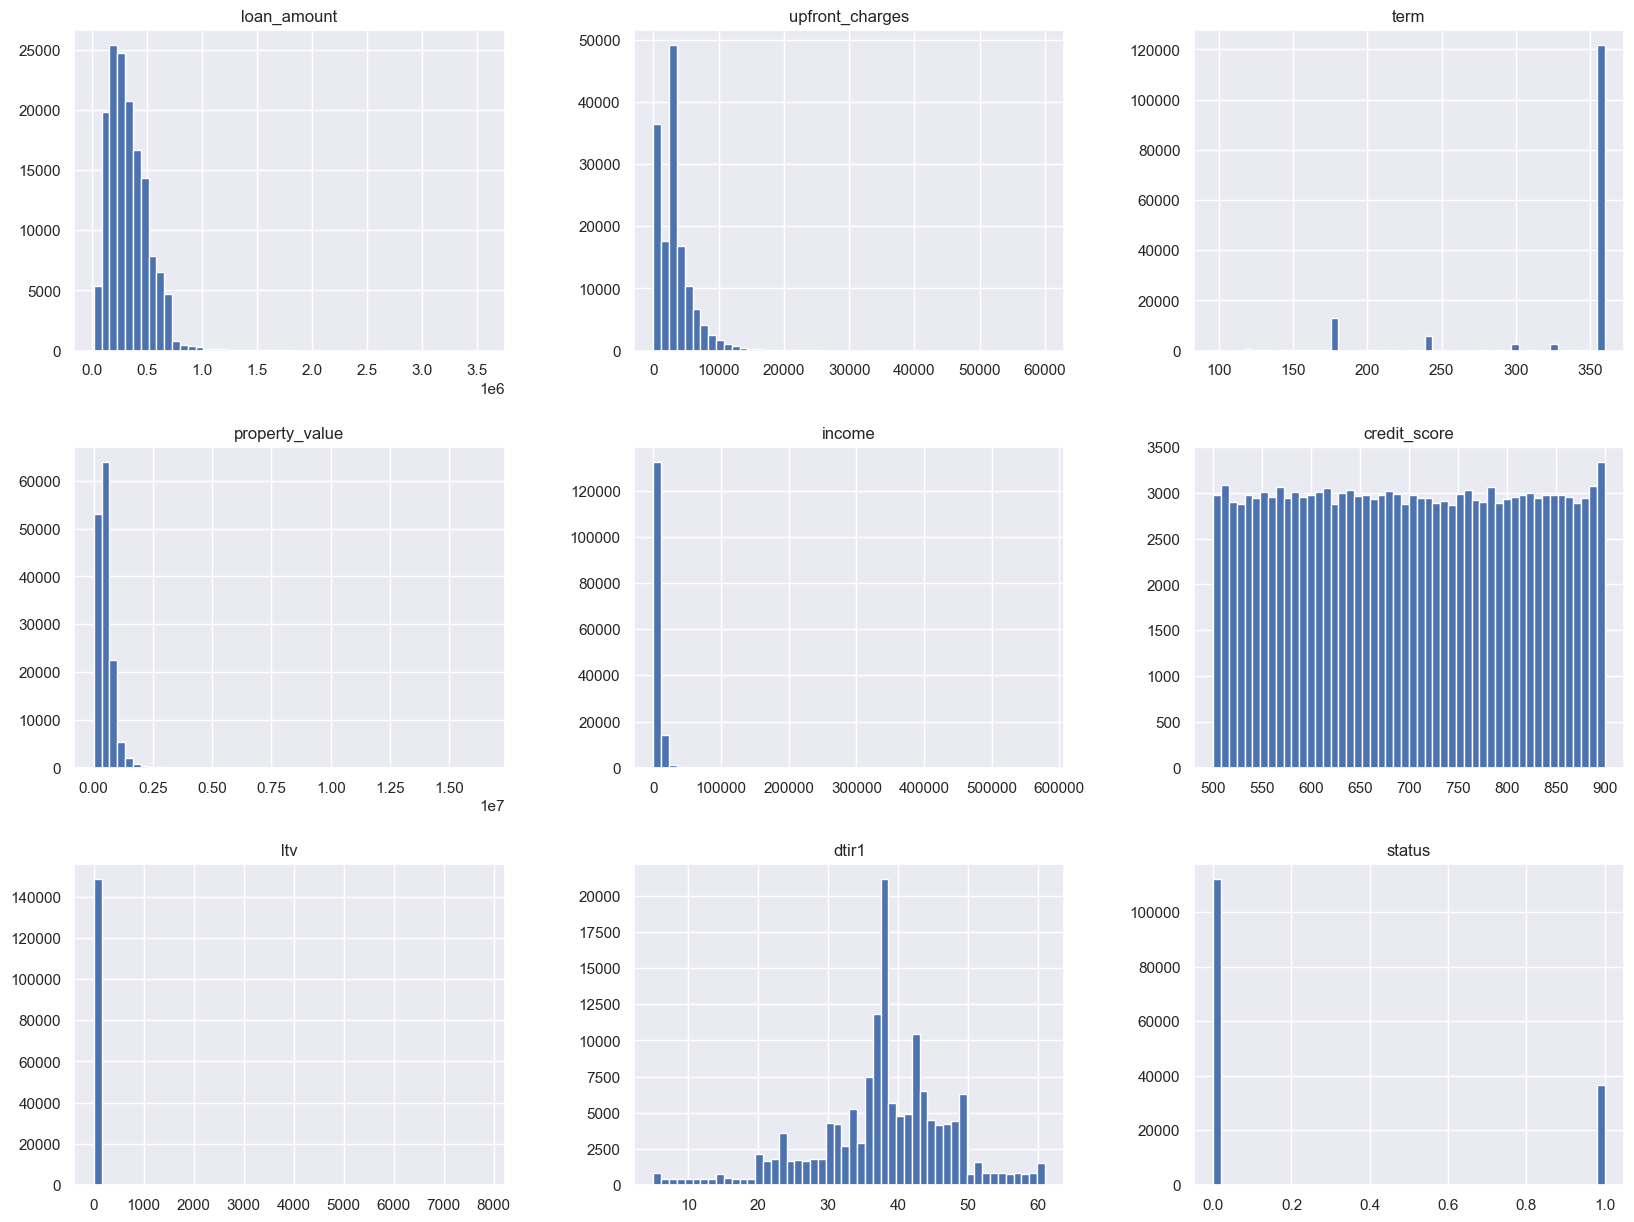

In [154]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

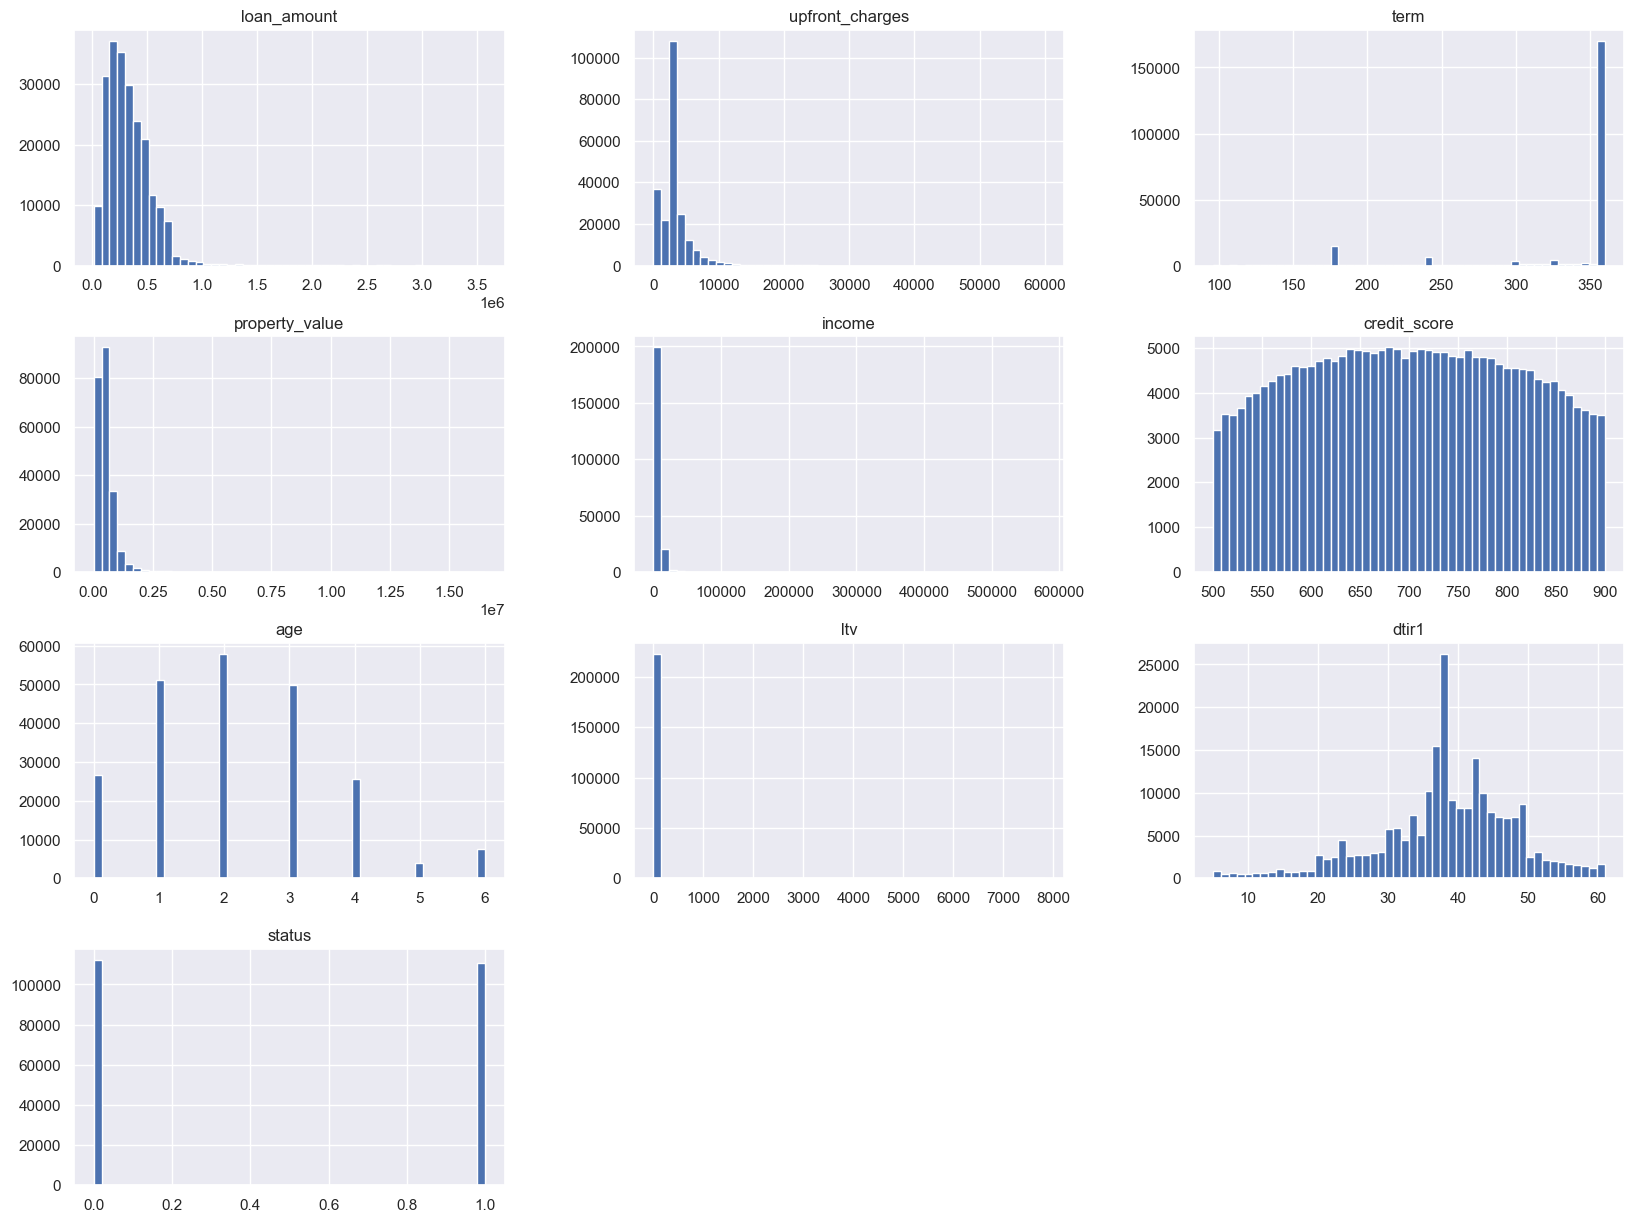

In [155]:
df_adasyn.hist(bins = 50, figsize = (20, 15))
plt.show()

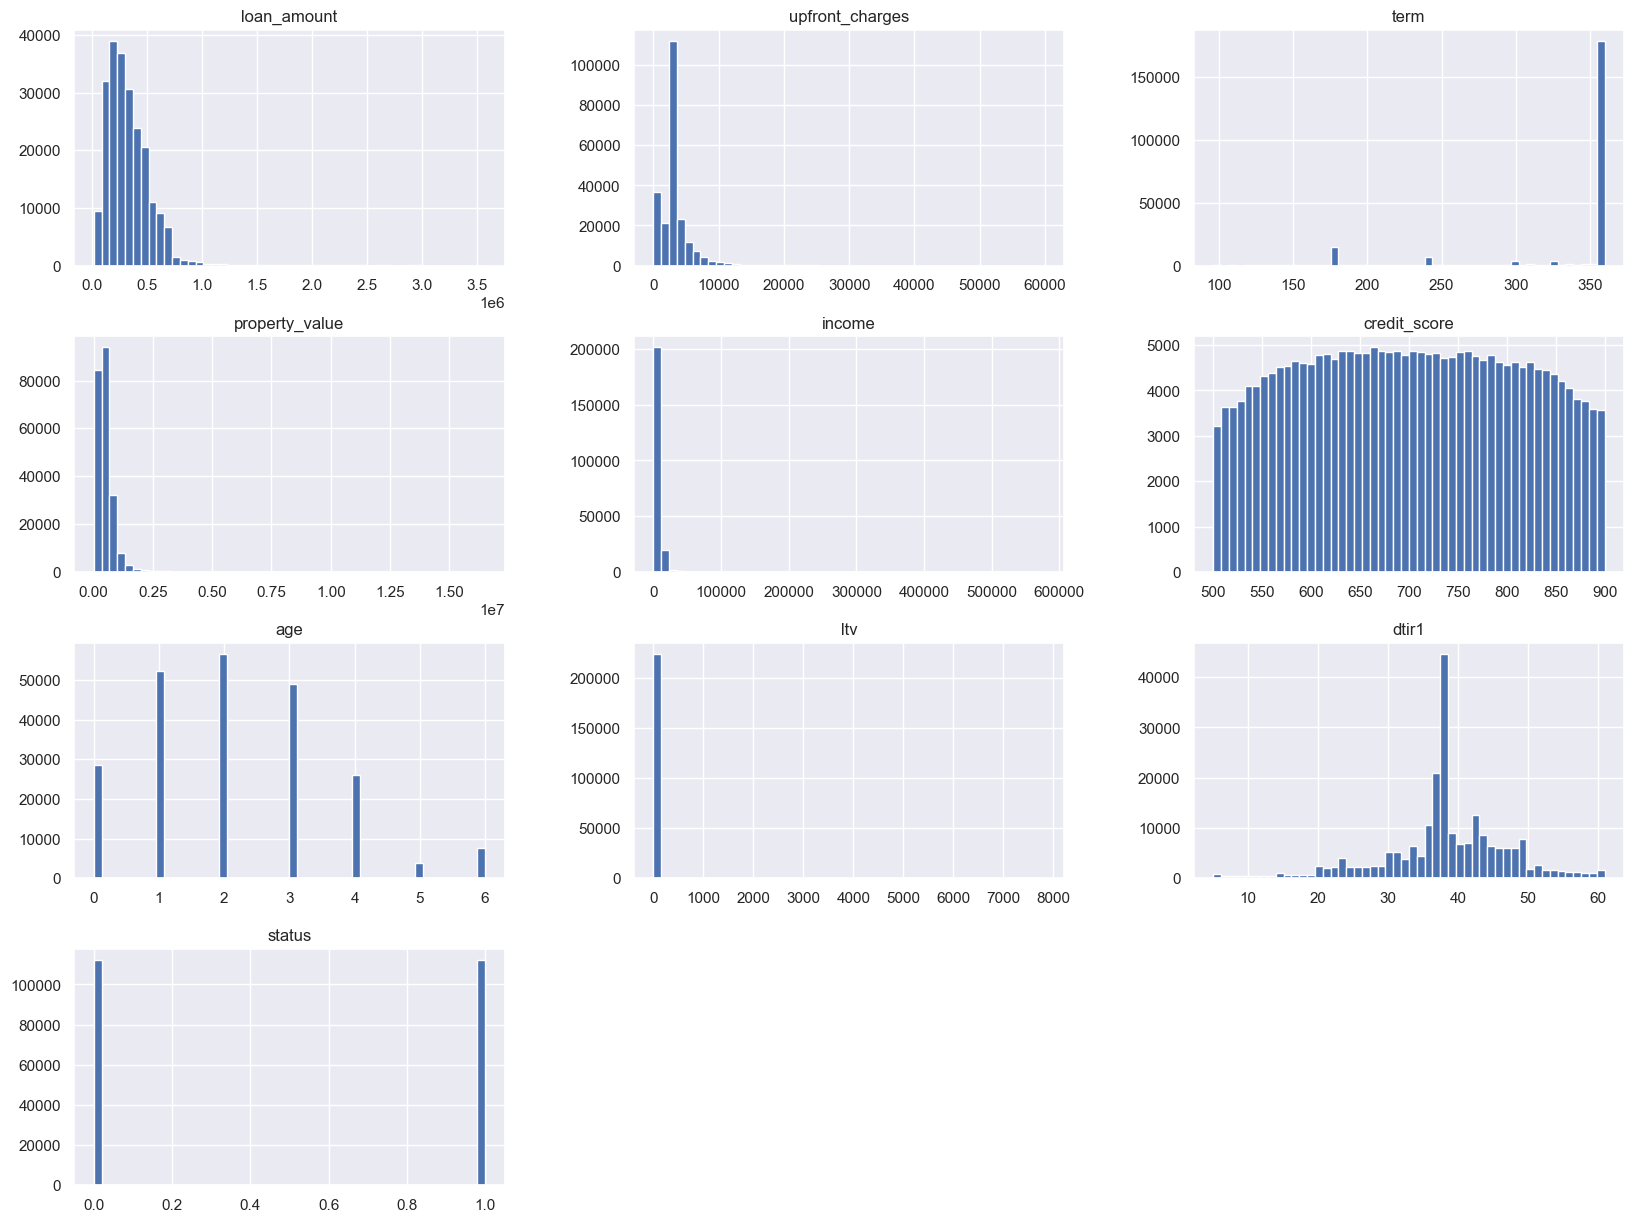

In [156]:
df_smote.hist(bins = 50, figsize = (20, 15))
plt.show()

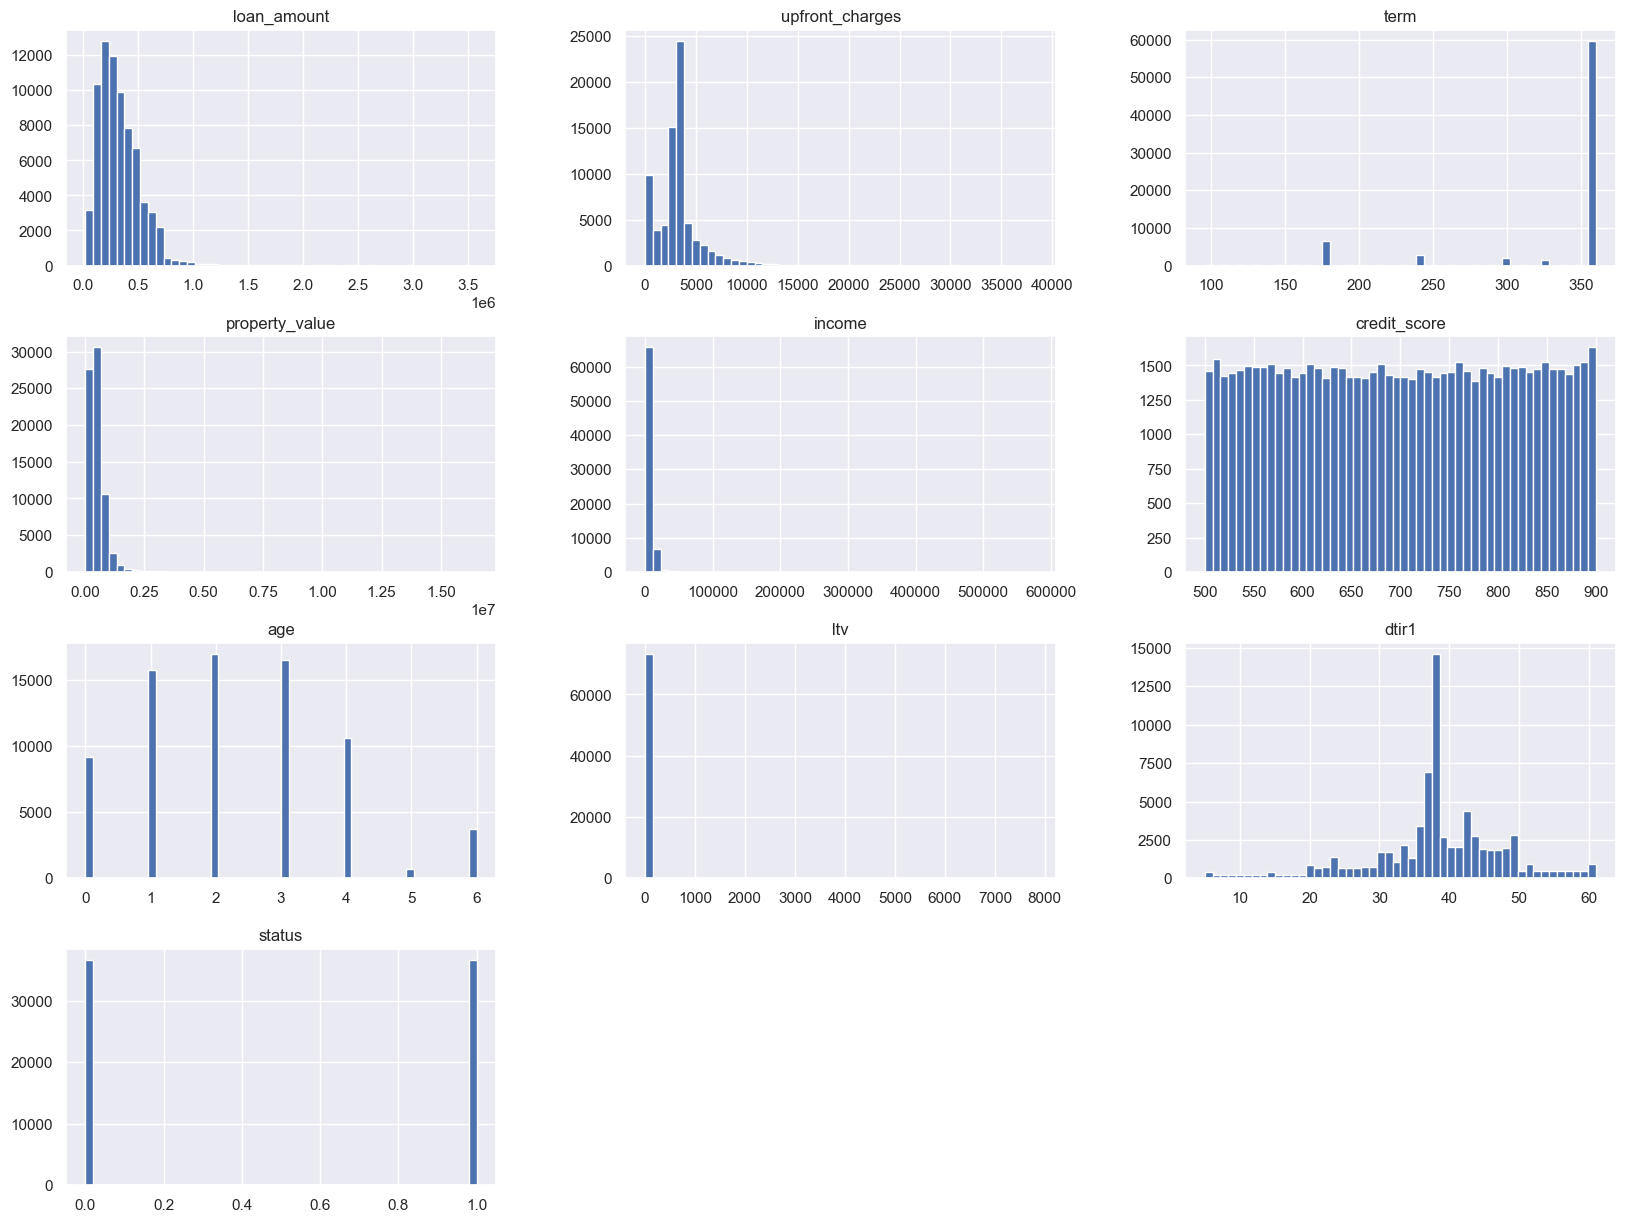

In [157]:
df_under.hist(bins = 50, figsize = (20, 15))
plt.show()

## 3.2 Correlation Analysis
Analyze correlations between numerical features

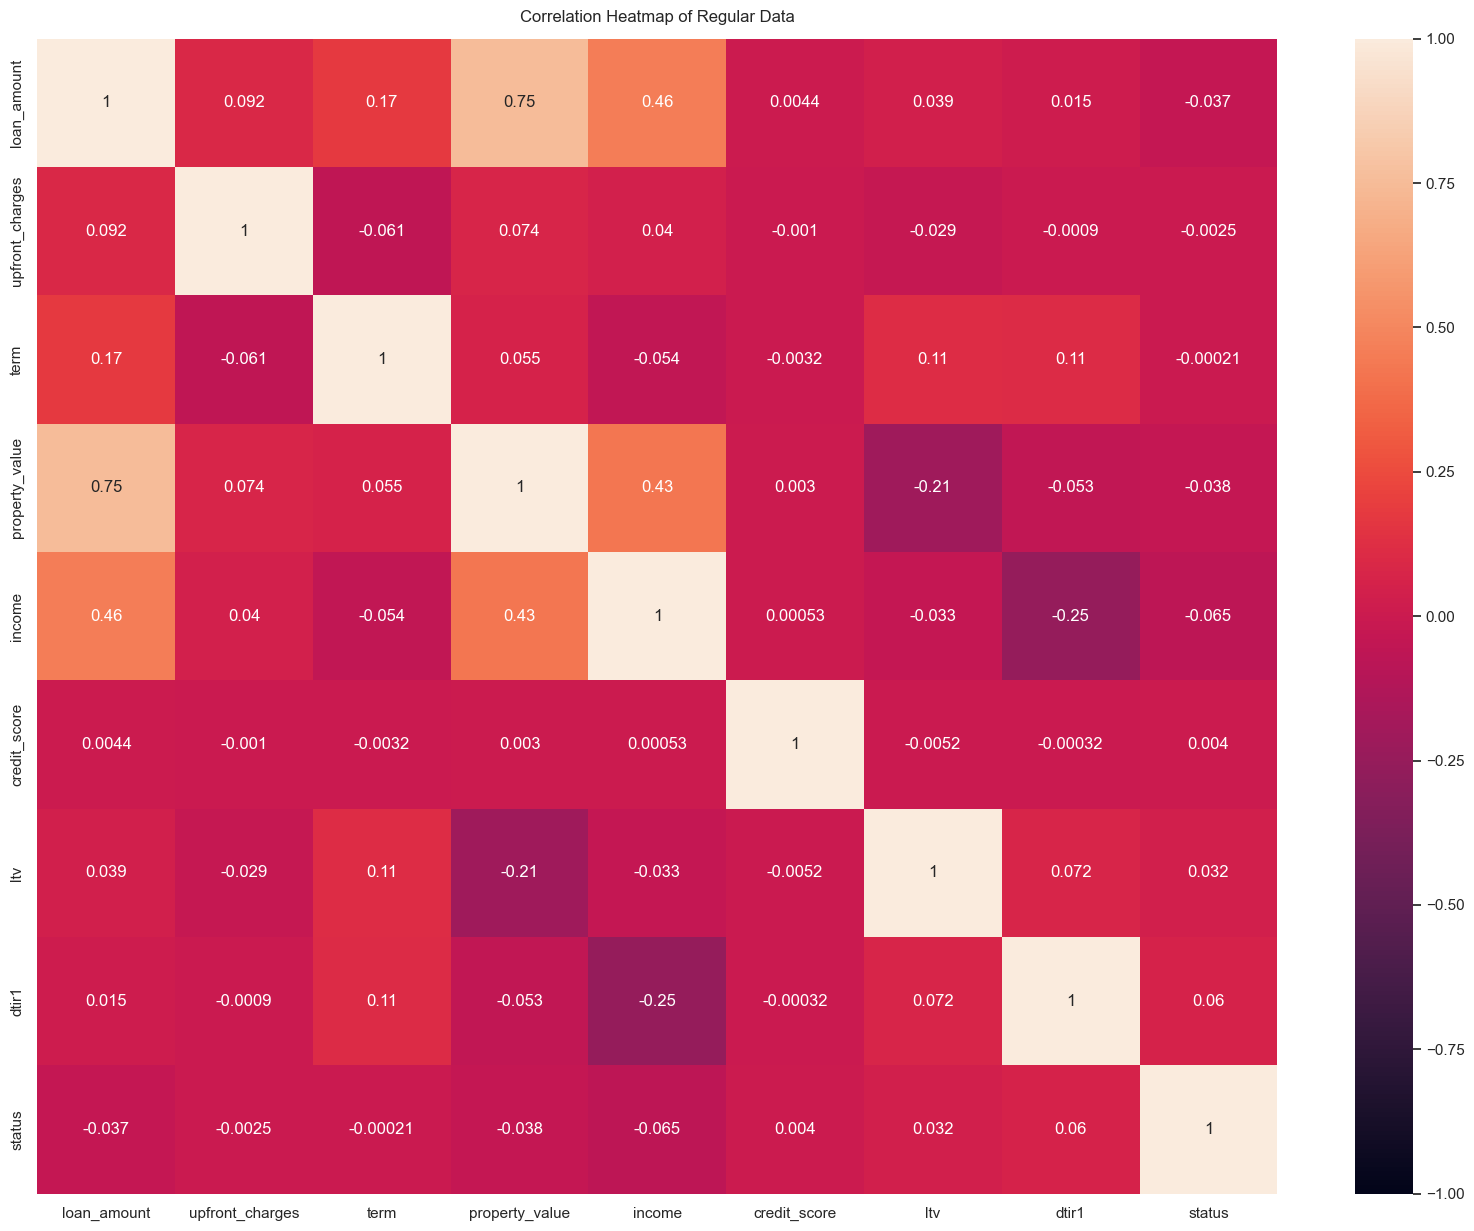

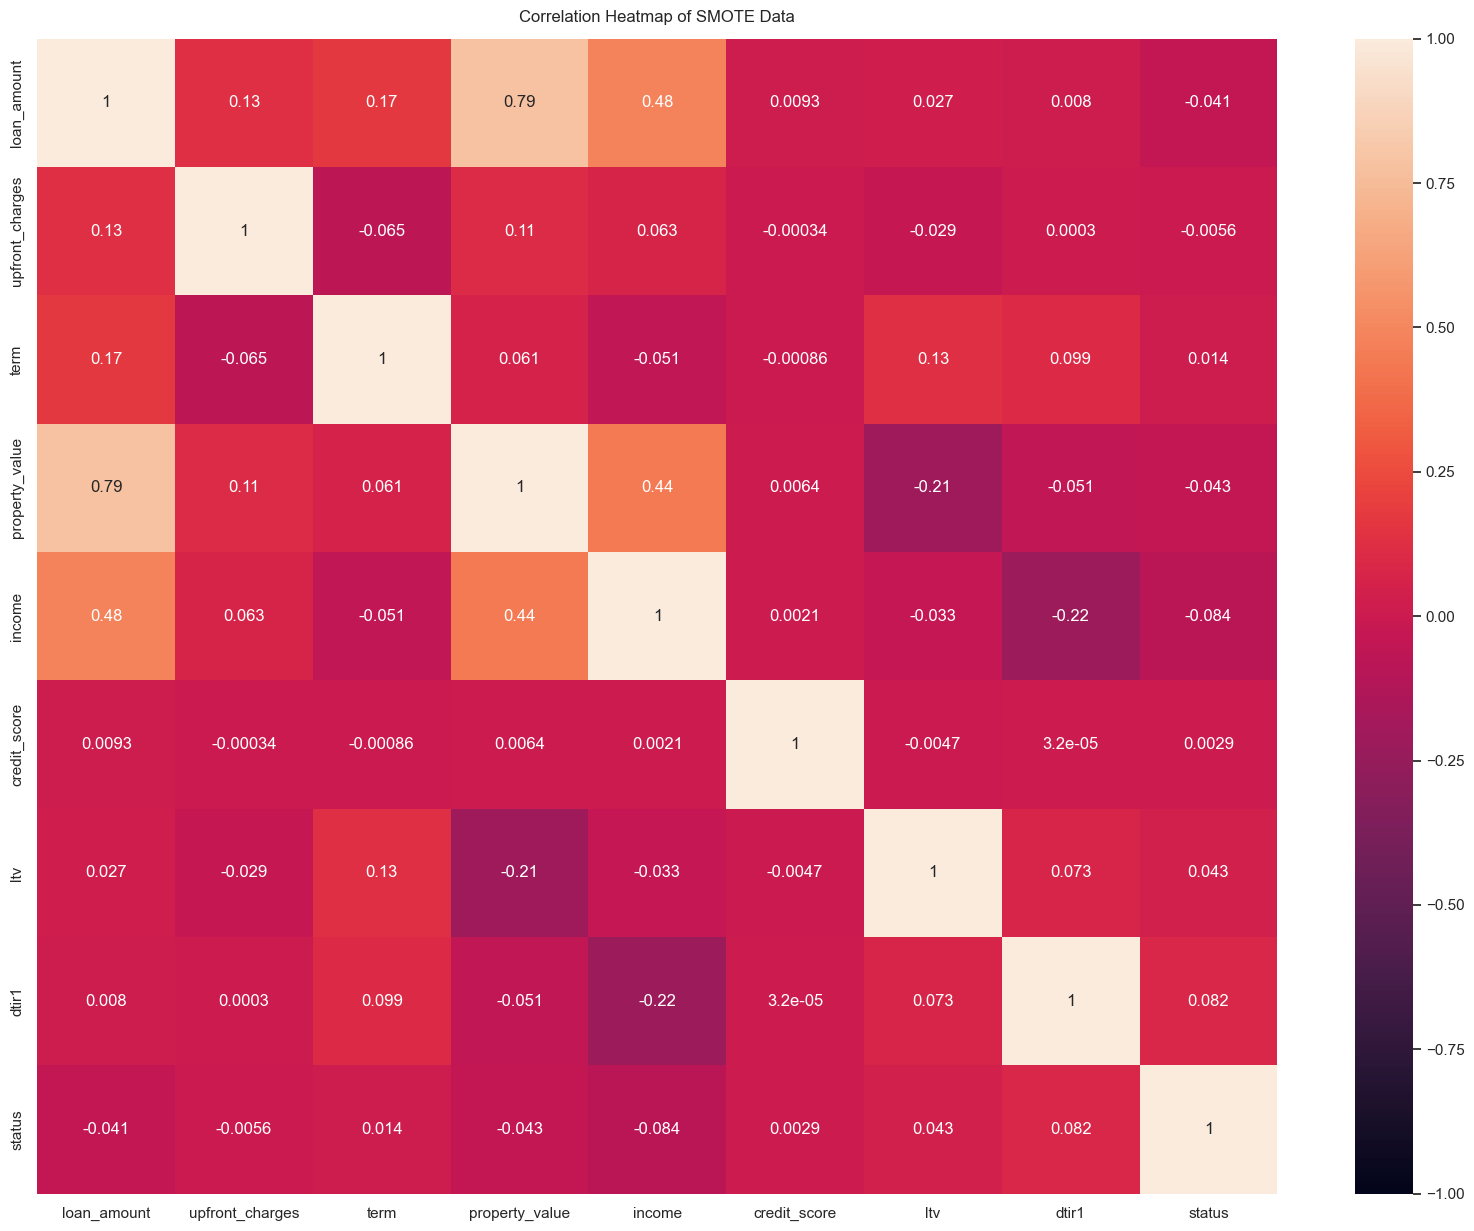

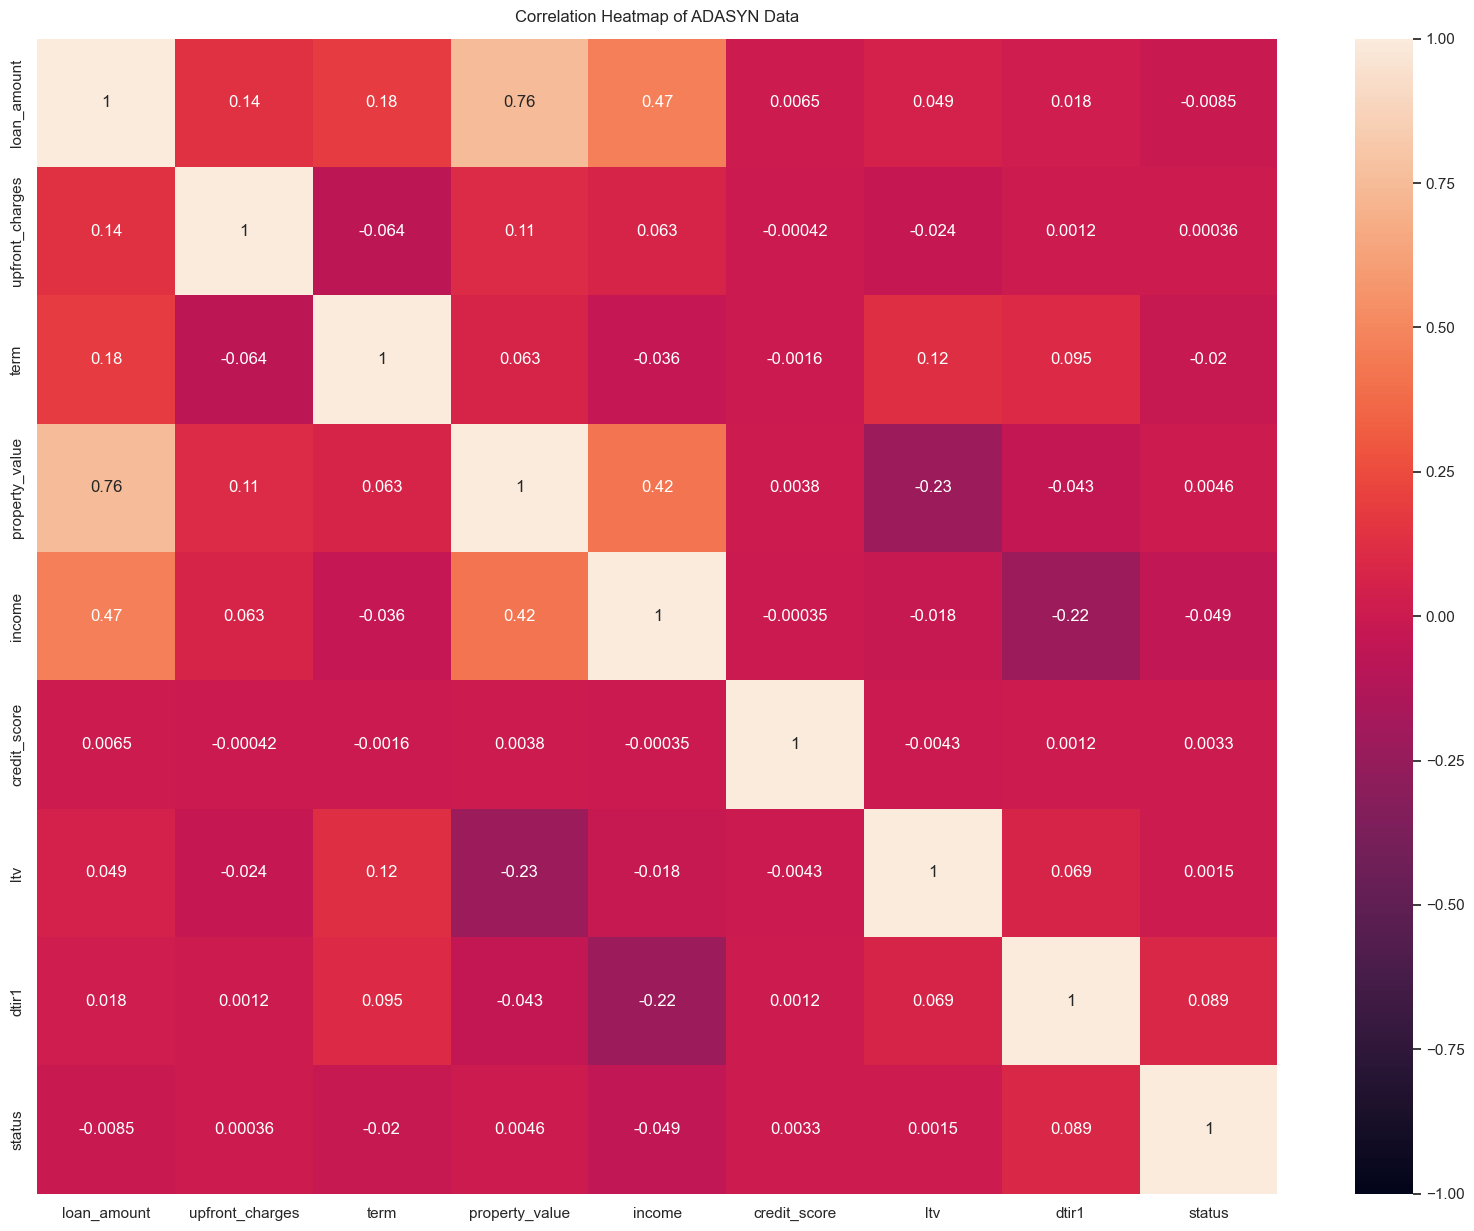

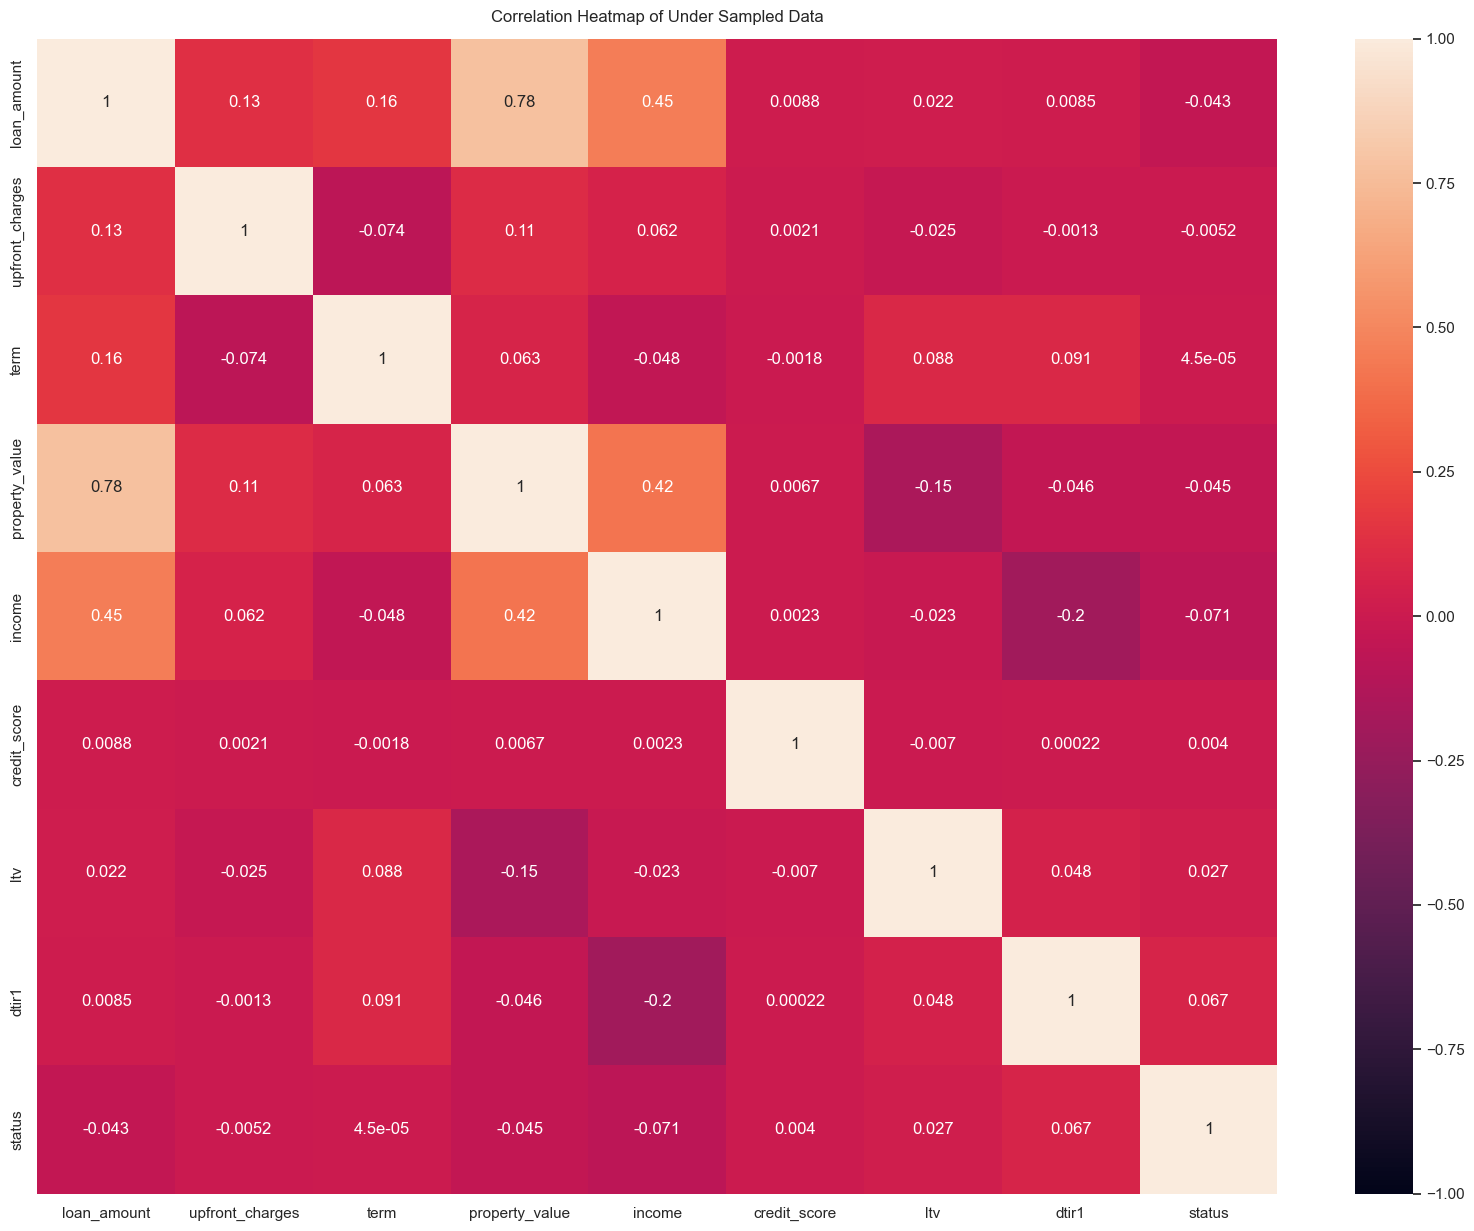

In [158]:
for i, title in enumerate(titles):
    corr = df_sets[i%4].drop(columns=["age"],axis=1).corr()
    plt.figure(figsize=(20, 15))
    heatmap = sb.heatmap(corr, vmin=-1, vmax=1, annot=True)
    heatmap.set_title('Correlation Heatmap of {}'.format(title), fontdict={'fontsize':12}, pad=12)

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">4. Scaling, Categorical Variables, and Splitting</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>
## 4.1 Splitting
Split the data into training and testing sets to avoid data leakage:

- **Train/Test Split:** Usually a 70/30 or 80/20 split.
- **Stratified Sampling:** If the dataset is imbalanced, ensure stratified sampling of the target variable.

In [159]:
# datas = [i : [j : None for j in ['X_train','X_test','y_train','y_test']]for i in titles]
datas = [[[None for i in range(4)] for j in range(3)] for j in range(4)]
Xs = [X,X_smote,X_adasyn,X_under]
ys = [y,y_smote,y_adasyn,y_under]
for index,i in enumerate(df_sets):
    X_train, X_test, y_train, y_test = train_test_split(Xs[index], ys[index], test_size=0.3, stratify=ys[index], random_state=1)
    datas[index][0][0]=X_train
    datas[index][0][1]=X_test
    for j in range(3):
        datas[index][j][2]=y_train
        datas[index][j][3]=y_test


## 4.2 Encoding Categorical Variables
Handle categorical features:

- **Label Encoding:** For ordinal variables.
- **One-Hot Encoding:** For nominal variables.

In [160]:
for i in range(4):
    datas[i][0][0] = pd.concat([datas[i][0][0].drop(columns=["age"],axis=1),pd.get_dummies(datas[i][0][0]['age'], drop_first=False)], axis=1)
    datas[i][0][0].columns = datas[i][0][0].columns.astype(str).str.lower()
    datas[i][0][1] = pd.concat([datas[i][0][1].drop(columns=["age"],axis=1),pd.get_dummies(datas[i][0][1]['age'], drop_first=False)], axis=1)
    datas[i][0][1].columns = datas[i][0][1].columns.astype(str).str.lower()


## 4.3 Scaling
Normalize or standardize features to improve model performance, especially for distance-based algorithms (e.g., k-NN, SVM):

In [161]:
scalers = {"standart": [], "minmax": []}
for index,i in enumerate(datas):
    minmax = MinMaxScaler()
    standart = StandardScaler()
    
    i[1][0] = minmax.fit_transform(i[0][0])
    i[1][1] = minmax.transform(i[0][1])
    i[2][0] = standart.fit_transform(i[0][0])
    i[2][1] = standart.transform(i[0][1])
    scalers["minmax"].append(minmax)
    scalers["standart"].append(standart)
       

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">5. Models</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## 5.1 Creating Models and Fine-Tuning
Build and evaluate baseline models using different machine learning algorithms. Improve model performance by tuning hyperparameters:

In [162]:
# Datas[Scaling Method][Scaler][X-Y Train-Test]


In [163]:
model_names = ["KNN","Decision Tree","Random Forest","Logistic Regression","MLP","XGBoost","LightGBM","CatBoost"]
Scaling = ["No Scaling","MinMax","Standart"]
results = {l:{i:{j:{k:None for k in ["Test","Train"]} for j in Scaling} for i in titles} for l in model_names}

In [164]:
def call_model(model_name):
    if model_name == "KNN":
        return KNeighborsClassifier()
    elif model_name == "Decision Tree":
        return DecisionTreeClassifier()
    elif model_name == "Random Forest":
        return RandomForestClassifier()
    elif model_name == "Logistic Regression":
        return LogisticRegression()
    elif model_name == "MLP":
        return MLPClassifier()
    elif model_name == "XGBoost":
        return XGBClassifier()
    elif model_name == "LightGBM":
        return LGBMClassifier()
    elif model_name == "CatBoost":
        return CatBoostClassifier()

In [165]:
trained_models = []
for index_m in model_names:
    for index,data in enumerate(datas):
        for index_s, scaled_data in enumerate(data):
            model = call_model(index_m)
            print(f"{index_m} - {titles[index]} - {Scaling[index_s]}")
            model.fit(scaled_data[0], scaled_data[2])
            results[index_m][titles[index]][Scaling[index_s]]["Train"] = model.score(scaled_data[0], scaled_data[2])
            predictions = model.predict(scaled_data[1])
            results[index_m][titles[index]][Scaling[index_s]]["Test"] = {
                "Accuracy": accuracy_score(scaled_data[3], predictions),
                "Precision": precision_score(scaled_data[3], predictions),
                "Recall": recall_score(scaled_data[3], predictions),
                "F1": f1_score(scaled_data[3], predictions),
                "Confusion Matrix": confusion_matrix(scaled_data[3], predictions)
            }
            trained_models
            print(f"{index_m} - {titles[index]} - {Scaling[index_s]} - {accuracy_score(scaled_data[3], predictions)}")

KNN - Regular Data - No Scaling
KNN - Regular Data - No Scaling - 0.8606757696015784
KNN - Regular Data - MinMax
KNN - Regular Data - MinMax - 0.8172910921279792
KNN - Regular Data - Standart
KNN - Regular Data - Standart - 0.8556758817066882
KNN - SMOTE Data - No Scaling
KNN - SMOTE Data - No Scaling - 0.8596378999985124
KNN - SMOTE Data - MinMax
KNN - SMOTE Data - MinMax - 0.821047620464452
KNN - SMOTE Data - Standart
KNN - SMOTE Data - Standart - 0.8750799625105997
KNN - ADASYN Data - No Scaling
KNN - ADASYN Data - No Scaling - 0.8395852348390765
KNN - ADASYN Data - MinMax
KNN - ADASYN Data - MinMax - 0.8126075441772777
KNN - ADASYN Data - Standart
KNN - ADASYN Data - Standart - 0.8674906109257403
KNN - Under Sampled Data - No Scaling
KNN - Under Sampled Data - No Scaling - 0.774745269286754
KNN - Under Sampled Data - MinMax
KNN - Under Sampled Data - MinMax - 0.7978984716157205
KNN - Under Sampled Data - Standart
KNN - Under Sampled Data - Standart - 0.8412481804949054
Decision Tre

C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Regular Data - No Scaling - 0.7535257057016659
Logistic Regression - Regular Data - MinMax
Logistic Regression - Regular Data - MinMax - 0.7535257057016659
Logistic Regression - Regular Data - Standart
Logistic Regression - Regular Data - Standart - 0.753660231833367
Logistic Regression - SMOTE Data - No Scaling


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - SMOTE Data - No Scaling - 0.5619839628676416
Logistic Regression - SMOTE Data - MinMax
Logistic Regression - SMOTE Data - MinMax - 0.5781698626876329
Logistic Regression - SMOTE Data - Standart
Logistic Regression - SMOTE Data - Standart - 0.5865305940284741
Logistic Regression - ADASYN Data - No Scaling


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - ADASYN Data - No Scaling - 0.5423667948468571
Logistic Regression - ADASYN Data - MinMax
Logistic Regression - ADASYN Data - MinMax - 0.5749255607259887
Logistic Regression - ADASYN Data - Standart
Logistic Regression - ADASYN Data - Standart - 0.5767360435712896
Logistic Regression - Under Sampled Data - No Scaling


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Under Sampled Data - No Scaling - 0.5708697234352256
Logistic Regression - Under Sampled Data - MinMax
Logistic Regression - Under Sampled Data - MinMax - 0.5458970160116449
Logistic Regression - Under Sampled Data - Standart
Logistic Regression - Under Sampled Data - Standart - 0.5632278020378457
MLP - Regular Data - No Scaling
MLP - Regular Data - No Scaling - 0.7526512858456088
MLP - Regular Data - MinMax


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP - Regular Data - MinMax - 0.8975807717315756
MLP - Regular Data - Standart
MLP - Regular Data - Standart - 0.9192843209793502
MLP - SMOTE Data - No Scaling
MLP - SMOTE Data - No Scaling - 0.8337374849372945
MLP - SMOTE Data - MinMax


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP - SMOTE Data - MinMax - 0.9169282494532796
MLP - SMOTE Data - Standart


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP - SMOTE Data - Standart - 0.9327719841116351
MLP - ADASYN Data - No Scaling
MLP - ADASYN Data - No Scaling - 0.8006374096628911
MLP - ADASYN Data - MinMax


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP - ADASYN Data - MinMax - 0.9110619005581075
MLP - ADASYN Data - Standart


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP - ADASYN Data - Standart - 0.9290320649978304
MLP - Under Sampled Data - No Scaling
MLP - Under Sampled Data - No Scaling - 0.6270924308588064
MLP - Under Sampled Data - MinMax


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP - Under Sampled Data - MinMax - 0.8977438136826783
MLP - Under Sampled Data - Standart


C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP - Under Sampled Data - Standart - 0.9228984716157205
XGBoost - Regular Data - No Scaling
XGBoost - Regular Data - No Scaling - 0.9604717383018317
XGBoost - Regular Data - MinMax
XGBoost - Regular Data - MinMax - 0.9604717383018317
XGBoost - Regular Data - Standart
XGBoost - Regular Data - Standart - 0.9604717383018317
XGBoost - SMOTE Data - No Scaling
XGBoost - SMOTE Data - No Scaling - 0.9674496794061203
XGBoost - SMOTE Data - MinMax
XGBoost - SMOTE Data - MinMax - 0.9674496794061203
XGBoost - SMOTE Data - Standart
XGBoost - SMOTE Data - Standart - 0.9674496794061203
XGBoost - ADASYN Data - No Scaling
XGBoost - ADASYN Data - No Scaling - 0.9657205272844254
XGBoost - ADASYN Data - MinMax
XGBoost - ADASYN Data - MinMax - 0.9657205272844254
XGBoost - ADASYN Data - Standart
XGBoost - ADASYN Data - Standart - 0.9657205272844254
XGBoost - Under Sampled Data - No Scaling
XGBoost - Under Sampled Data - No Scaling - 0.9585152838427947
XGBoost - Under Sampled Data - MinMax
XGBoost - Under S

In [ ]:
import pickle

for model_name in model_names:
    for title in titles:
        for scaling in Scaling:
            with open(f"{model_name}_{title}_{scaling}.pkl", 'wb') as file:
                pickle.dump(results[model_name][title][scaling], file)


## 5.2 Model Comparisons
Compare the performance of different models.

In [170]:
test_accuracies = []

for model_name, preprocess_dict in results.items():
    for preprocess, scaling_dict in preprocess_dict.items():
        for scaling, metrics in scaling_dict.items():
            test_metrics = metrics.get("Test", None)
            if test_metrics and "Accuracy" in test_metrics:
                test_accuracies.append({
                    "Model": model_name,
                    "Preprocessing": preprocess,
                    "Scaling": scaling,
                    "Accuracy": test_metrics["Accuracy"]
                })

sorted_accuracies = sorted(test_accuracies, key=lambda x: x["Accuracy"], reverse=True)

for entry in sorted_accuracies:
    print(f"Model: {entry['Model']}, Preprocessing: {entry['Preprocessing']}, Scaling: {entry['Scaling']}, Accuracy: {entry['Accuracy']:.2f}")


Model: KNN, Preprocessing: SMOTE Data, Scaling: MinMax, Accuracy: 0.90
Model: Random Forest, Preprocessing: Regular Data, Scaling: MinMax, Accuracy: 0.90
Model: MLP, Preprocessing: ADASYN Data, Scaling: Standart, Accuracy: 0.90
Model: Decision Tree, Preprocessing: SMOTE Data, Scaling: Standart, Accuracy: 0.89
Model: Decision Tree, Preprocessing: ADASYN Data, Scaling: Standart, Accuracy: 0.89
Model: Random Forest, Preprocessing: Under Sampled Data, Scaling: No Scaling, Accuracy: 0.89
Model: LightGBM, Preprocessing: Regular Data, Scaling: Standart, Accuracy: 0.89
Model: CatBoost, Preprocessing: Regular Data, Scaling: Standart, Accuracy: 0.89
Model: CatBoost, Preprocessing: SMOTE Data, Scaling: Standart, Accuracy: 0.89
Model: CatBoost, Preprocessing: ADASYN Data, Scaling: Standart, Accuracy: 0.89
Model: MLP, Preprocessing: SMOTE Data, Scaling: No Scaling, Accuracy: 0.88
Model: LightGBM, Preprocessing: ADASYN Data, Scaling: No Scaling, Accuracy: 0.88
Model: CatBoost, Preprocessing: ADASYN 

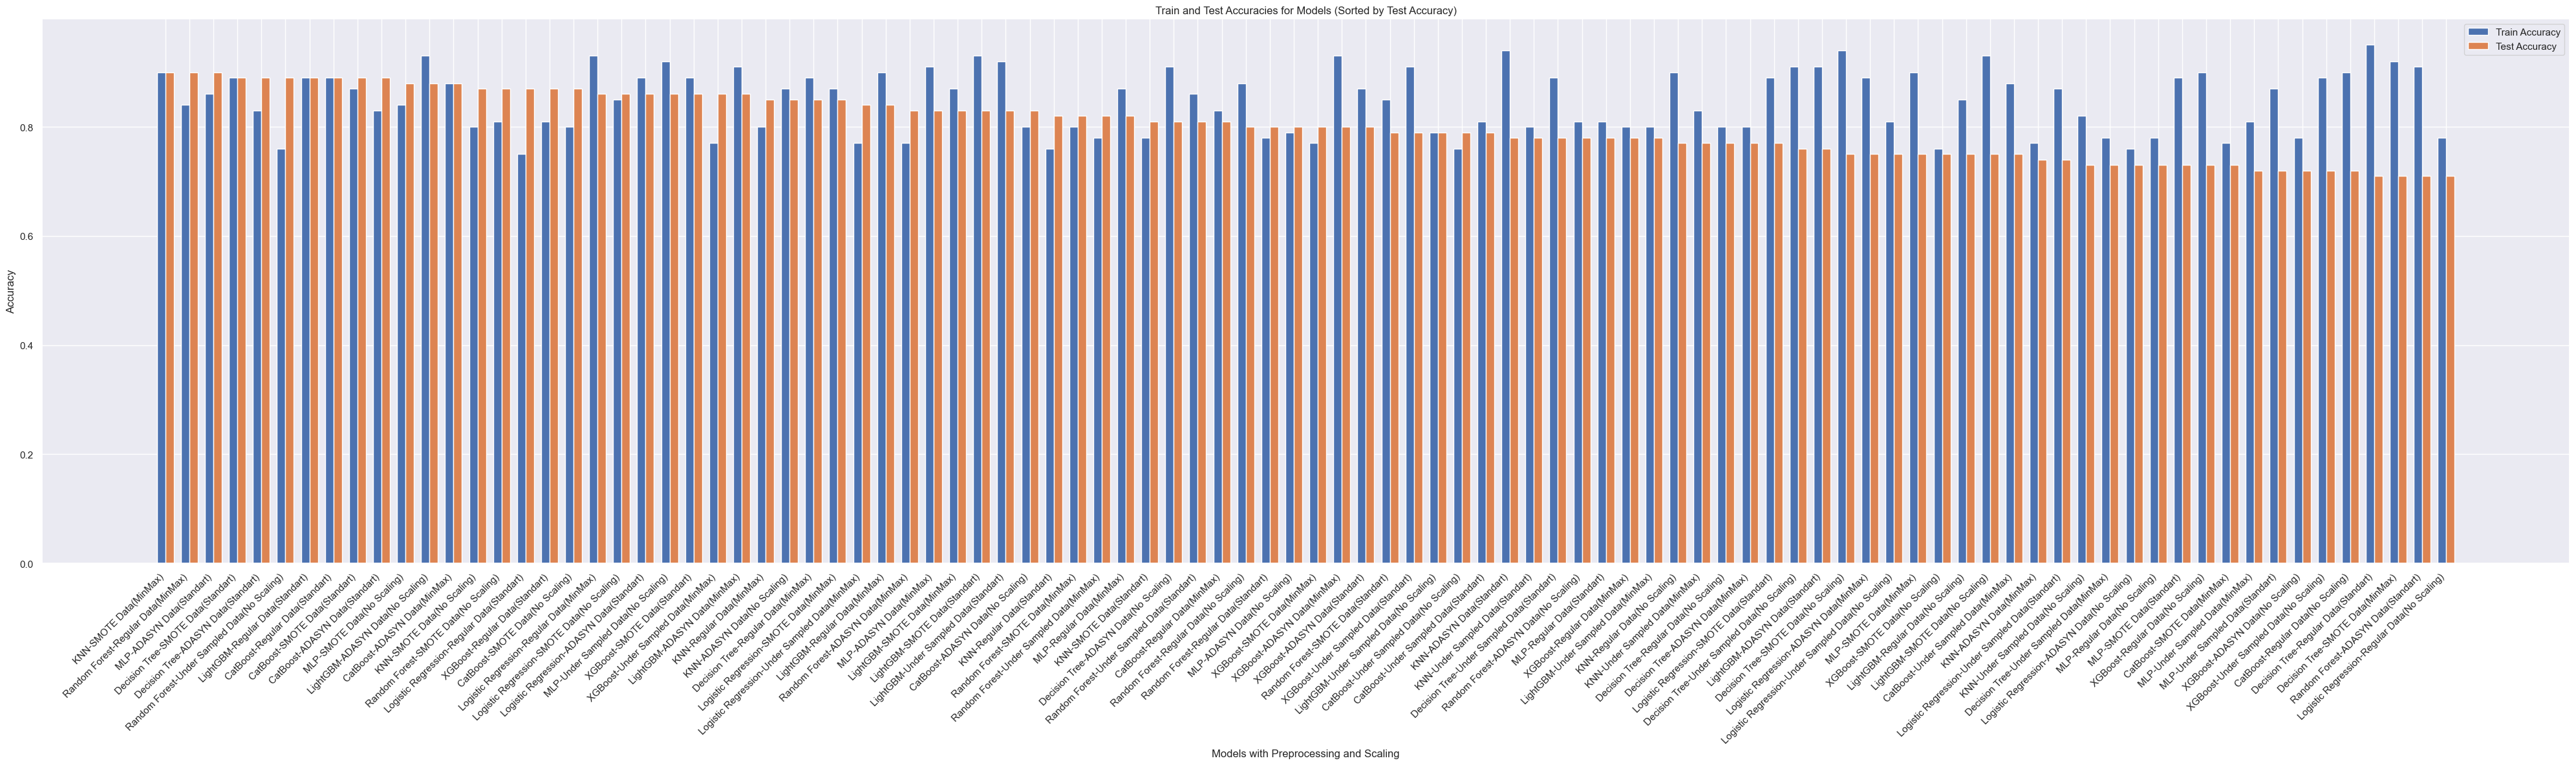

In [ ]:
train_accuracies = []
test_accuracies = []
x_labels = []

for model_name, preprocess_dict in results.items():
    for preprocess, scaling_dict in preprocess_dict.items():
        for scaling, metrics in scaling_dict.items():
            train_accuracy = metrics.get("Train", None)
            test_metrics = metrics.get("Test", None)
            test_accuracy = test_metrics.get("Accuracy", None) if test_metrics else None
            
            if train_accuracy is not None and test_accuracy is not None:
                x_labels.append(f"{model_name}-{preprocess}({scaling})")
                train_accuracies.append(train_accuracy)
                test_accuracies.append(test_accuracy)


data = list(zip(x_labels, train_accuracies, test_accuracies))
data_sorted = sorted(data, key=lambda x: x[2], reverse=True)
x_labels_sorted, train_accuracies_sorted, test_accuracies_sorted = zip(*data_sorted)

# Plotting
x = range(len(x_labels_sorted)) 
width = 0.35 

plt.figure(figsize=(40, 12))

plt.bar([pos - width/2 for pos in x], train_accuracies_sorted, width, label='Train Accuracy')
plt.bar([pos + width/2 for pos in x], test_accuracies_sorted, width, label='Test Accuracy')

plt.xlabel("Models with Preprocessing and Scaling")
plt.ylabel("Accuracy")
plt.title("Train and Test Accuracies for Models (Sorted by Test Accuracy)")
plt.xticks(ticks=x, labels=x_labels_sorted, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## 5.3 Feature Importance
Analyze and explain the most important features:

## 5.4 Final Model
Choose the best-performing model based on your evaluations and fine-tuning.

## 5.5 Create a Model with Fewer Features (if necessary)

## 5.6 Pickle the Model
Save the final model for future deployment:

## <p style="background-color:#fea162; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">6. Conclusion</p>

<a id="6"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## Final Remarks
Summarize the key takeaways from the project. Highlight what was learned throughout the data science workflow and model deployment.

......